### EDA
We are given a huge amount of data for customers' orders, locations of a restaurants. Let us see what insights we might from it

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
#import geopandas as gpd
#import folium
#from folium.plugins import HeatMap
import re

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 5);
sns.set_style('whitegrid')

First, we are given some varibale explanations.

In [3]:
with open('./input/restaurant-recommendation-challenge/VariableDefinitions.txt') as f:
    print(f.read())

ï»¿Train Customers


Information on the customers in the training set. 


'akeed_customer_id': Unique customer ID, used in train_locations and train_orders
'gender': Customer gender
'dob': Birth Year (if entered)
'status' and 'verified': Account status
'language': Chosen language
'Created_at' and 'updated_at': dates when account was created/updated


Train Locations


Each customer orders from one or more locations. Each is assigned a location number. 
'customer_id': The unique customer ID 
'location_number': Location number (most customers have one or two)
'location_type': Home, Work, Other or NA
'Latitude' and 'longitude': Not true latitude and longitude - locations have been masked, but nearby locations remain nearby in the new reference frame and can thus be used for clustering. However, not all locations are useful due to GPS errors and missing data - you may want to treat outliers separately.


Train Orders


This is a record of all orders made by customers in the train set from 

In [3]:
#chunk_size=1000000
root_dir = './input/restaurant-recommendation-challenge'
train_full = pd.read_csv(os.path.join(root_dir, 'train_full.csv'))
orders = pd.read_csv(os.path.join(root_dir, 'orders.csv'))

C:\Users\anban\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\anban\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15,16,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [21]:
train_full

,customer_id,gender,status_x,verified_x,created_at_x,updated_at_x,location_number,location_type,latitude_x,longitude_x,...,country_id,city_id,created_at_y,updated_at_y,device_type,display_orders,location_number_obj,id_obj,CID X LOC_NUM X VENDOR,target
0,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.20,...,1.0,1.0,2018-01-30 14:42:04,2020-04-07 15:12:43,3,1,0,4,TCHWPBT X 0 X 4,0
1,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.20,...,1.0,1.0,2018-05-03 12:32:06,2020-04-05 20:46:03,3,1,0,13,TCHWPBT X 0 X 13,0
2,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.20,...,1.0,1.0,2018-05-04 22:28:22,2020-04-07 16:35:55,3,1,0,20,TCHWPBT X 0 X 20,0
3,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.20,...,1.0,1.0,2018-05-06 19:20:48,2020-04-02 00:56:17,3,1,0,23,TCHWPBT X 0 X 23,0
4,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.20,...,1.0,1.0,2018-05-17 22:12:38,2020-04-05 15:57:41,3,1,0,28,TCHWPBT X 0 X 28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5802395,LBMRK7A,NaN,1,1,2020-03-03 13:31:52,2020-03-03 13:32:09,0,Other,19.83,3.03,...,1.0,1.0,2019-12-21 12:47:39,2020-04-07 20:01:33,3,1,0,849,LBMRK7A X 0 X 849,0
5802396,LBMRK7A,NaN,1,1,2020-03-03 13:31:52,2020-03-03 13:32:09,0,Other,19.83,3.03,...,1.0,1.0,2019-12-21 13:02:32,2020-04-07 01:50:41,3,1,0,855,LBMRK7A X 0 X 855,0
5802397,LBMRK7A,NaN,1,1,2020-03-03 13:31:52,2020-03-03 13:32:09,0,Other,19.83,3.03,...,1.0,1.0,2019-12-21 13:04:34,2020-04-06 23:53:16,3,1,0,856,LBMRK7A X 0 X 856,0
5802398,LBMRK7A,NaN,1,1,2020-03-03 13:31:52,2020-03-03 13:32:09,0,Other,19.83,3.03,...,1.0,1.0,2019-12-21 13:12:09,2020-04-07 14:26:08,3,1,0,858,LBMRK7A X 0 X 858,0


In [22]:
orders

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR
0,163238.0,92PEE24,1.0,7.6,2,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,NaN,92PEE24 X 0 X 105
1,163240.0,QS68UD8,1.0,8.7,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,294,2019-08-01 05:31:10,0,Work,QS68UD8 X 0 X 294
2,163241.0,MB7VY5F,2.0,14.4,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,NaN,MB7VY5F X 0 X 83
3,163244.0,KDJ951Y,1.0,7.1,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,Home,KDJ951Y X 0 X 90
4,163245.0,BAL0RVT,4.0,27.2,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,Work,BAL0RVT X 0 X 83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135298,415507.0,L6LFY6H,1.0,13.3,2,NaN,0.0,0.0,No,No,...,2020-02-29 23:59:21,2020-03-01 00:02:10,2020-03-01 00:22:53,2020-03-01 00:29:42,NaN,67,2020-02-29 23:47:59,0,NaN,L6LFY6H X 0 X 67
135299,415508.0,2GMMVGI,3.0,9.5,1,NaN,0.0,0.0,No,Yes,...,2020-03-01 00:19:46,2020-03-01 00:20:05,2020-03-01 00:27:50,2020-03-01 01:03:14,NaN,79,2020-02-29 23:48:37,0,Work,2GMMVGI X 0 X 79
135300,415510.0,LYTAAV0,4.0,18.2,2,NaN,0.0,0.0,No,No,...,2020-03-01 00:04:28,2020-03-01 00:10:34,2020-03-01 00:14:43,2020-03-01 00:36:37,NaN,28,2020-02-29 23:48:43,2,Other,LYTAAV0 X 2 X 28
135301,415512.0,NEV9A5D,3.0,7.7,1,NUE5BZAA7,0.0,0.0,No,No,...,2020-03-01 00:06:14,2020-03-01 00:08:10,2020-03-01 00:22:11,2020-03-01 00:36:52,NaN,841,2020-02-29 23:50:10,0,NaN,NEV9A5D X 0 X 841


In [23]:
vendors = pd.read_csv(os.path.join(root_dir, 'vendors.csv'))

Files attached are realy vast, let's pick just a sample of those for performance and basic analysis.

In [24]:
#train_full = train_full.sample(chunk_size)
#orders = orders.sample(chunk_size//10)

In [25]:
train_full.head()

,customer_id,gender,status_x,verified_x,created_at_x,updated_at_x,location_number,location_type,latitude_x,longitude_x,...,country_id,city_id,created_at_y,updated_at_y,device_type,display_orders,location_number_obj,id_obj,CID X LOC_NUM X VENDOR,target
0,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.2,...,1.0,1.0,2018-01-30 14:42:04,2020-04-07 15:12:43,3,1,0,4,TCHWPBT X 0 X 4,0
1,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.2,...,1.0,1.0,2018-05-03 12:32:06,2020-04-05 20:46:03,3,1,0,13,TCHWPBT X 0 X 13,0
2,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.2,...,1.0,1.0,2018-05-04 22:28:22,2020-04-07 16:35:55,3,1,0,20,TCHWPBT X 0 X 20,0
3,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.2,...,1.0,1.0,2018-05-06 19:20:48,2020-04-02 00:56:17,3,1,0,23,TCHWPBT X 0 X 23,0
4,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.2,...,1.0,1.0,2018-05-17 22:12:38,2020-04-05 15:57:41,3,1,0,28,TCHWPBT X 0 X 28,0


In [26]:
train_full.keys()

Index(['customer_id', 'gender', 'status_x', 'verified_x', 'created_at_x',
       'updated_at_x', 'location_number', 'location_type', 'latitude_x',
       'longitude_x', 'id', 'authentication_id', 'latitude_y', 'longitude_y',
       'vendor_category_en', 'vendor_category_id', 'delivery_charge',
       'serving_distance', 'is_open', 'OpeningTime', 'OpeningTime2',
       'prepration_time', 'commission', 'is_akeed_delivering',
       'discount_percentage', 'status_y', 'verified_y', 'rank', 'language',
       'vendor_rating', 'sunday_from_time1', 'sunday_to_time1',
       'sunday_from_time2', 'sunday_to_time2', 'monday_from_time1',
       'monday_to_time1', 'monday_from_time2', 'monday_to_time2',
       'tuesday_from_time1', 'tuesday_to_time1', 'tuesday_from_time2',
       'tuesday_to_time2', 'wednesday_from_time1', 'wednesday_to_time1',
       'wednesday_from_time2', 'wednesday_to_time2', 'thursday_from_time1',
       'thursday_to_time1', 'thursday_from_time2', 'thursday_to_time2',
       

In [27]:
orders.head()

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR
0,163238.0,92PEE24,1.0,7.6,2,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,NaN,92PEE24 X 0 X 105
1,163240.0,QS68UD8,1.0,8.7,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,294,2019-08-01 05:31:10,0,Work,QS68UD8 X 0 X 294
2,163241.0,MB7VY5F,2.0,14.4,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,NaN,MB7VY5F X 0 X 83
3,163244.0,KDJ951Y,1.0,7.1,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,Home,KDJ951Y X 0 X 90
4,163245.0,BAL0RVT,4.0,27.2,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,Work,BAL0RVT X 0 X 83


In [28]:
train_full.isna().sum().sum()

56756172

<AxesSubplot:>

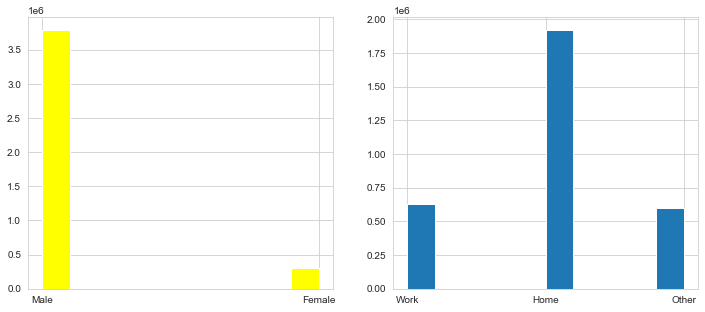

In [29]:
fig, ax = plt.subplots(1, 2)
train_full['gender'].hist(ax=ax[0], color='yellow')
train_full['location_type'].hist(ax=ax[1])

In [30]:
train_full['country_id'].value_counts()

1.0    5802400
Name: country_id, dtype: int64

Hm, let us see where are our locations anyway.

In [31]:
#location Useful

locs = pd.read_csv(os.path.join(root_dir, 'train_locations.csv'))
locs.dropna(subset=['latitude'], inplace=True)
locs.dropna(subset=['longitude'], inplace=True)
print(locs.head())
print(locs['latitude'])
print(locs['longitude'])

  customer_id  location_number location_type  latitude  longitude
0     02SFNJH                0           NaN  1.682392 -78.789737
1     02SFNJH                1           NaN  1.679137   0.766823
2     02SFNJH                2           NaN -0.498648   0.661241
3     RU43CXC                0          Home  0.100853   0.438165
4     BDFBPRD                0           NaN  2.523125   0.733464
0        1.682392
1        1.679137
2       -0.498648
3        0.100853
4        2.523125
           ...   
59498   -0.788515
59499   -1.445114
59500   -0.001785
59501   -0.066291
59502   -0.067043
Name: latitude, Length: 59497, dtype: float64
0       -78.789737
1         0.766823
2         0.661241
3         0.438165
4         0.733464
           ...    
59498   -78.497721
59499     0.072558
59500     0.431695
59501   -78.583075
59502     0.648221
Name: longitude, Length: 59497, dtype: float64


In [13]:
m = folium.Map(location=[50,-85], zoom_start=2)
for i in list(locs.index)[:500]:
    folium.Marker([locs.loc[i, 'latitude'], locs.loc[i, 'longitude']]).add_to(m)
m

Needless to say there is something wrong with our location data. At least we confirmed statment from variale defenitions.
> 'Latitude' and 'longitude': Not true latitude and longitude - locations have been masked, but nearby locations remain nearby in the new reference frame and can thus be used for clustering. However, not all locations are useful due to GPS errors and missing data - you may want to treat outliers separately.

In [32]:
sorted(train_full['location_number'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

array([[<AxesSubplot:title={'center':'status_x'}>,
        <AxesSubplot:title={'center':'status_y'}>]], dtype=object)

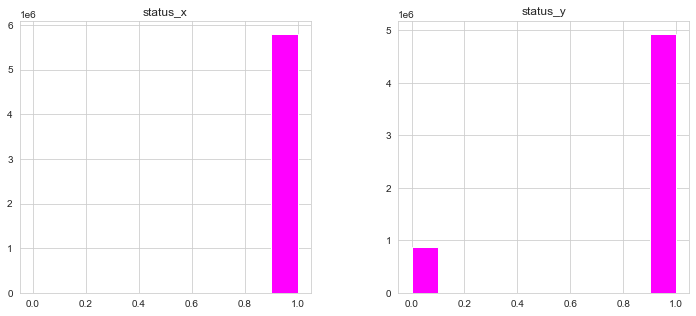

In [33]:
train_full[['status_x', 'status_y']].hist(color='magenta')   #restaurant loc with respect to center location  Discard

In [34]:
train_full['discount_percentage'].value_counts()  #Useful

0.0     5570304
50.0      58024
10.0      58024
35.0      58024
15.0      58024
Name: discount_percentage, dtype: int64

In [35]:
train_full['commission'].unique()  #discard

array([ 0., nan])

In [36]:
train_full['display_orders'].value_counts()    #Useful tfidf

1    5802400
Name: display_orders, dtype: int64

<AxesSubplot:>

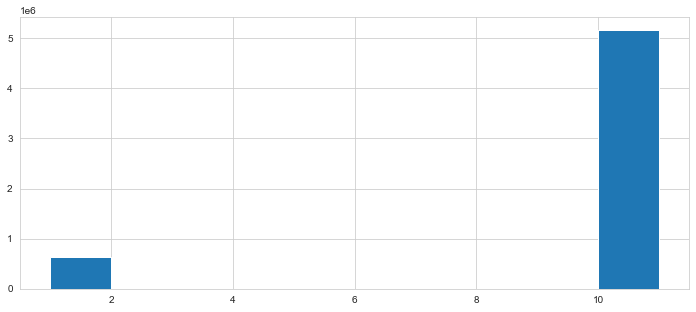

In [37]:
train_full['rank'].hist()  #Useful

<AxesSubplot:>

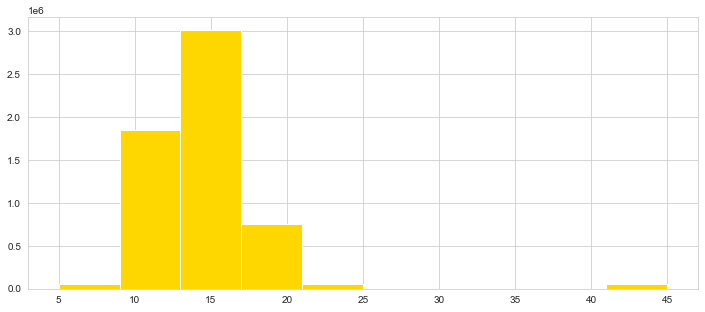

In [38]:
train_full['prepration_time'].hist(color='gold')

Well... we have many not really informative features here. Probably we can get better insights from orders and customers individually?

In [39]:
orders.head()

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR
0,163238.0,92PEE24,1.0,7.6,2,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,NaN,92PEE24 X 0 X 105
1,163240.0,QS68UD8,1.0,8.7,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,294,2019-08-01 05:31:10,0,Work,QS68UD8 X 0 X 294
2,163241.0,MB7VY5F,2.0,14.4,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,NaN,MB7VY5F X 0 X 83
3,163244.0,KDJ951Y,1.0,7.1,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,Home,KDJ951Y X 0 X 90
4,163245.0,BAL0RVT,4.0,27.2,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,Work,BAL0RVT X 0 X 83


In [40]:
orders.keys()

Index(['akeed_order_id', 'customer_id', 'item_count', 'grand_total',
       'payment_mode', 'promo_code', 'vendor_discount_amount',
       'promo_code_discount_percentage', 'is_favorite', 'is_rated',
       'vendor_rating', 'driver_rating', 'deliverydistance', 'preparationtime',
       'delivery_time', 'order_accepted_time', 'driver_accepted_time',
       'ready_for_pickup_time', 'picked_up_time', 'delivered_time',
       'delivery_date', 'vendor_id', 'created_at', 'LOCATION_NUMBER',
       'LOCATION_TYPE', 'CID X LOC_NUM X VENDOR'],
      dtype='object')

In [41]:
orders.describe()

,akeed_order_id,item_count,grand_total,payment_mode,vendor_discount_amount,promo_code_discount_percentage,vendor_rating,driver_rating,deliverydistance,preparationtime,vendor_id,LOCATION_NUMBER
count,135233.000000,128378.000000,135303.000000,135303.000000,135303.000000,65880.000000,45220.000000,135303.000000,135303.000000,79743.000000,135303.000000,135303.000000
mean,265190.206155,2.405404,15.374513,1.345159,0.001053,0.026639,1.959730,0.675366,4.104255,43.181721,239.214866,0.867527
std,85051.488939,1.645332,12.556177,0.763712,0.047331,0.813320,2.313294,1.667261,4.361884,7.107582,226.437406,1.239884
min,11044.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,4.000000,0.000000
25%,190852.000000,1.000000,8.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,84.000000,0.000000
50%,267166.000000,2.000000,11.700000,1.000000,0.000000,0.000000,0.000000,0.000000,2.900000,45.000000,157.000000,0.000000
75%,336230.000000,3.000000,18.500000,1.000000,0.000000,0.000000,5.000000,0.000000,7.920000,45.000000,299.000000,1.000000
max,415515.000000,68.000000,783.800000,5.000000,10.650000,25.000000,5.000000,5.000000,19.810000,90.000000,907.000000,25.000000


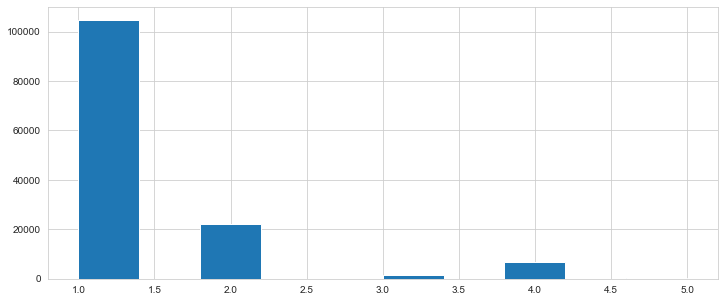

In [42]:
plt.hist(orders['payment_mode']);

<AxesSubplot:>

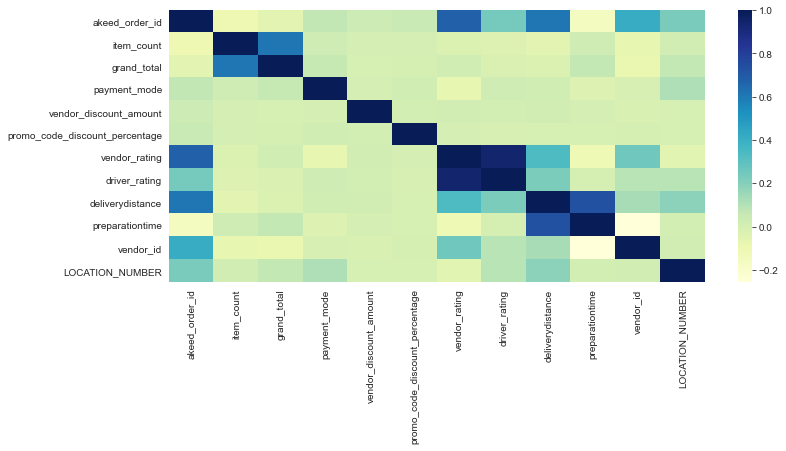

In [43]:
sns.heatmap(orders.corr(), cmap="YlGnBu")

C:\Users\anban\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anban\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item_count', ylabel='Density'>

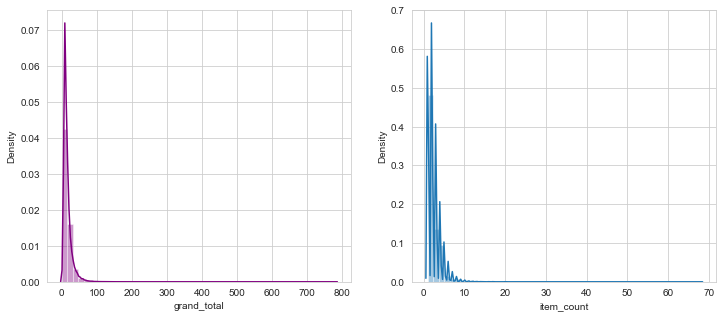

In [44]:
fig, ax = plt.subplots(1, 2)
sns.distplot(orders['grand_total'], ax=ax[0], color='purple')
sns.distplot(orders['item_count'], ax=ax[1])

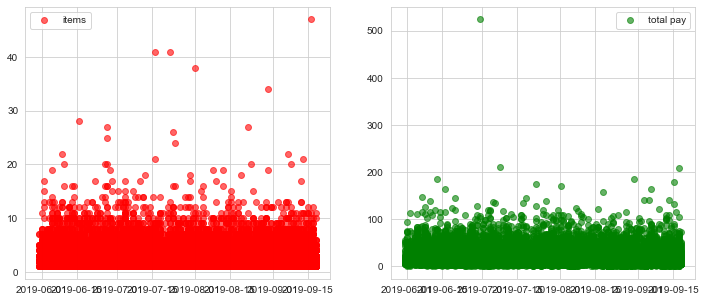

In [45]:
fig, ax = plt.subplots(1, 2)
orders.loc[:, 'delivery_date'] = pd.to_datetime(orders['delivery_date'])
ax[0].scatter(orders.set_index('delivery_date').index, orders['item_count'], 
              label='items', alpha=0.6, color='red')
ax[0].legend();
ax[1].scatter(orders.set_index('delivery_date').index, orders['grand_total'], 
              label='total pay', alpha=0.6, color='green')
ax[1].legend();

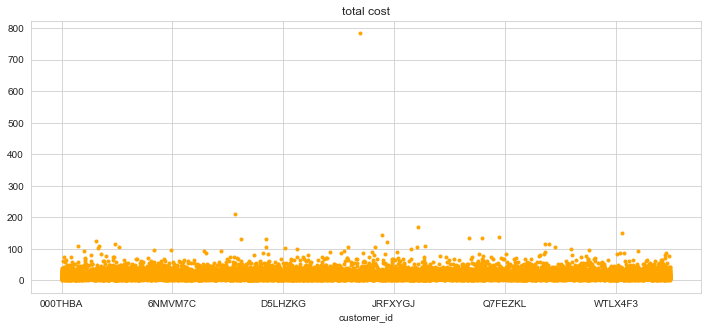

In [46]:
orders.groupby('customer_id').mean()['grand_total'].plot(marker='.', linestyle='none', color='orange')
plt.title('total cost');

Huh, we even have people how appear to pay nothing... at least according to the given data. Let's dig some more.

In [47]:
orders[orders['grand_total']==0.0]

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR
1098,165489.0,LL9V1Q6,1.0,0.0,1,burgerhood,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-08-04 05:30:00,294,2019-08-05 01:59:22,1,Work,LL9V1Q6 X 1 X 294
1533,166323.0,RN1V9YM,2.0,0.0,1,burgerhood,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-08-05 05:30:00,294,2019-08-06 03:13:08,0,NaN,RN1V9YM X 0 X 294
1538,166334.0,ED5HG2X,2.0,0.0,1,burgerhood,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-08-05 05:30:00,294,2019-08-06 03:23:10,0,Home,ED5HG2X X 0 X 294
1592,166435.0,TI95U8F,2.0,0.0,1,burgerhood,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-08-05 05:30:00,294,2019-08-06 04:35:13,0,Home,TI95U8F X 0 X 294
1594,166441.0,FBLBZVK,2.0,0.0,1,burgerhood,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-08-05 05:30:00,294,2019-08-06 04:38:49,0,Other,FBLBZVK X 0 X 294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132869,408842.0,5OPT6J0,3.0,0.0,5,Maha02,0.0,0.0,No,Yes,...,2020-02-26 21:50:01,2020-02-26 21:44:07,2020-02-26 22:06:19,2020-02-26 22:18:07,NaT,44,2020-02-26 21:40:39,0,Home,5OPT6J0 X 0 X 44
133095,409403.0,89RX7G0,3.0,0.0,5,akeed1146,0.0,0.0,No,No,...,2020-02-27 00:06:52,2020-02-27 00:01:44,2020-02-27 00:22:01,2020-02-27 00:39:35,NaT,86,2020-02-26 23:51:29,0,NaN,89RX7G0 X 0 X 86
133921,411651.0,DI3KI8H,1.0,0.0,5,NU5D6Y6DA,0.0,0.0,No,No,...,2020-02-28 00:42:44,2020-02-28 00:48:05,2020-02-28 01:06:07,2020-02-28 01:17:36,NaT,845,2020-02-28 00:33:23,0,NaN,DI3KI8H X 0 X 845
134436,413094.0,4L1NE6M,2.0,0.0,5,MM7U48E,0.0,0.0,No,Yes,...,2020-02-28 22:36:02,2020-02-28 22:41:18,2020-02-28 23:02:40,2020-02-28 23:13:42,NaT,79,2020-02-28 22:16:42,0,NaN,4L1NE6M X 0 X 79


In [48]:
orders[orders['grand_total']==0.0]['promo_code'].isna().sum(), orders[orders['grand_total']==0.0].shape

(58, (683, 26))

Okay, so most of these people used promo code. A bit of insight we've got.

In [49]:
customers = pd.read_csv('./input/restaurant-recommendation-challenge/train_customers.csv')
customers.head()

,akeed_customer_id,gender,dob,status,verified,language,created_at,updated_at
0,TCHWPBT,Male,NaN,1,1,EN,2018-02-07 19:16:23,2018-02-07 19:16:23
1,ZGFSYCZ,Male,NaN,1,1,EN,2018-02-09 12:04:42,2018-02-09 12:04:41
2,S2ALZFL,Male,NaN,0,1,EN,2018-03-14 18:31:43,2018-03-14 18:31:42
3,952DBJQ,Male,NaN,1,1,EN,2018-03-15 19:47:07,2018-03-15 19:47:07
4,1IX6FXS,Male,NaN,1,1,EN,2018-03-15 19:57:01,2018-03-15 19:57:01


In [50]:
customers['akeed_customer_id'].nunique(), customers.shape[0]

(34523, 34674)

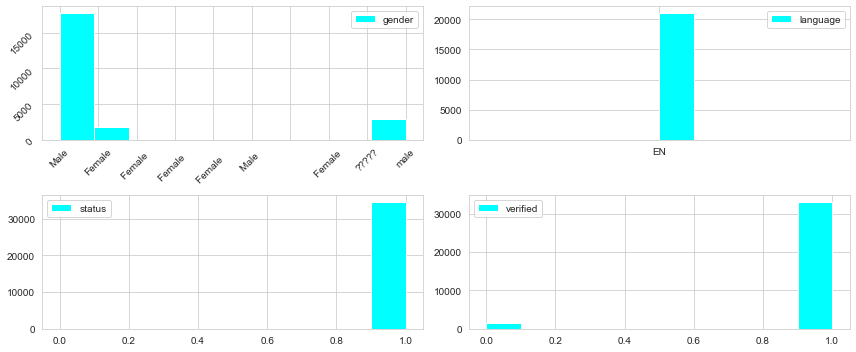

In [51]:
dists = ['gender', 'language', 'status', 'verified']
d=0
fig, ax = plt.subplots(2, 2)
for i in range(2):
    for j in range(2):
        customers[dists[d]].dropna().hist(ax=ax[i][j], label=dists[d], color='aqua')
        if dists[d] == 'gender':
            ax[i][j].tick_params(rotation=45)
        ax[i][j].legend();
        plt.tight_layout();
        d+=1

Ouch, there is some mess going on in the gender column.

<AxesSubplot:>

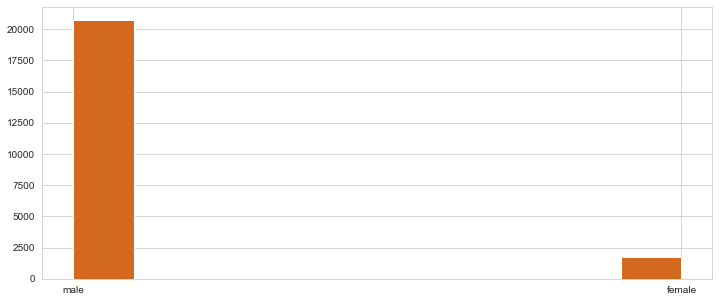

In [52]:
def clean_string(string):
    string = str(string)
    if '?' in string or string=='nan' or string.strip(' ')=='':
        return np.nan
    string = string.strip(' ').lower()
    return string

customers.loc[:, 'gender'] = customers['gender'].apply(clean_string)
customers['gender'].hist(color='chocolate')

In [53]:
def calc_age(year):
    if len(str(year))==2:
        if str(year).startswith('0'):
            year = '20'+str(year)
        else:
            year = '19'+str(year)
        year = int(year)
    if year is None:
        return np.nan
    return 2020-year

customers.loc[:, 'age'] = customers['dob'].apply(calc_age)
customers[customers['age']<16]

,akeed_customer_id,gender,dob,status,verified,language,created_at,updated_at,age
29,X282CGD,male,2018.0,1,1,EN,2018-05-06 00:29:46,2018-05-06 00:29:46,2.0
51,NL77W34,male,2018.0,1,1,EN,2018-05-11 23:09:38,2018-05-11 23:09:37,2.0
87,X02L5G7,male,2019.0,1,1,EN,2018-05-13 17:35:17,2018-05-13 17:35:17,1.0
101,3JH0AKZ,female,2018.0,1,1,EN,2018-05-15 18:09:28,2018-05-15 18:09:28,2.0
170,7M90ED1,female,2019.0,1,1,EN,2018-05-24 13:21:41,2018-05-24 13:21:40,1.0
...,...,...,...,...,...,...,...,...,...
33790,GTT1TQH,female,2020.0,1,1,NaN,2020-02-25 01:01:31,2020-02-25 01:03:54,0.0
33801,07294KB,female,2006.0,1,1,NaN,2020-02-25 02:53:36,2020-02-25 02:55:48,14.0
33891,6VXKXXH,male,2020.0,1,1,NaN,2020-02-25 23:06:03,2020-02-25 23:15:25,0.0
34317,TPYN5DV,male,2020.0,1,1,NaN,2020-02-29 15:54:07,2020-03-04 15:20:23,0.0


Well... customers as young as 1 y.o. looks truely suspicious, not too mention the accounts of such customers seems to be created the same year or even earlier than they were born... That's funny but with high confidence we can tell these are mistaken records.

<AxesSubplot:>

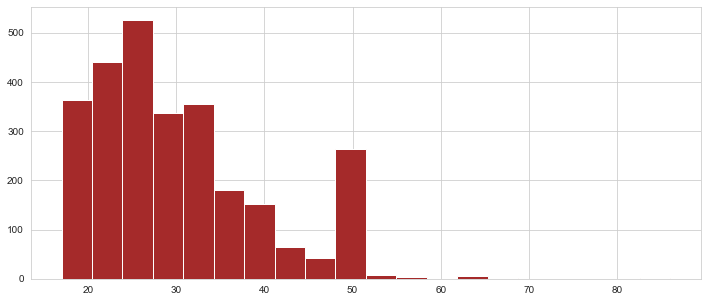

In [54]:
ages = customers[customers['age']>16]
ages = ages[ages['age']<110]
ages['age'].dropna().hist(bins=20, label='customers by age', color='brown')

That will conclude our quick look at data given. Clearly we need somewhat more effective tools to deal with high volume of data. That is what we will be doing in the <a href='https://www.kaggle.com/erelin6613/pyspark-alternating-least-squares-in-action?scriptVersionId=39511328'>next notebook</a>.

<AxesSubplot:>

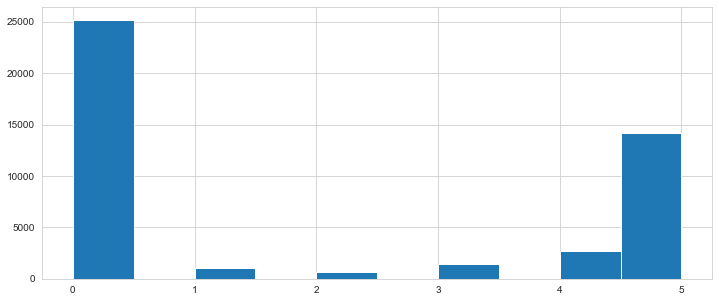

In [55]:
orders['vendor_rating'].hist()

In [56]:
orders['delivery_time'].value_counts()

0000-00-00 00:00:00    42
2019-08-17 00:30:00     4
2020-01-28 13:00:00     4
2020-02-12 12:30:00     4
2019-08-07 02:30:00     4
                       ..
2019-12-04 15:21:00     1
2019-10-07 20:05:00     1
2019-07-20 02:20:00     1
2020-02-27 17:30:00     1
2019-06-20 08:19:00     1
Name: delivery_time, Length: 4823, dtype: int64

In [57]:
orders.keys()

Index(['akeed_order_id', 'customer_id', 'item_count', 'grand_total',
       'payment_mode', 'promo_code', 'vendor_discount_amount',
       'promo_code_discount_percentage', 'is_favorite', 'is_rated',
       'vendor_rating', 'driver_rating', 'deliverydistance', 'preparationtime',
       'delivery_time', 'order_accepted_time', 'driver_accepted_time',
       'ready_for_pickup_time', 'picked_up_time', 'delivered_time',
       'delivery_date', 'vendor_id', 'created_at', 'LOCATION_NUMBER',
       'LOCATION_TYPE', 'CID X LOC_NUM X VENDOR'],
      dtype='object')

In [58]:
key_to_remove_from_orders = ['akeed_order_id','promo_code', 'vendor_discount_amount','payment_mode','driver_rating','order_accepted_time','ready_for_pickup_time', 'picked_up_time', 'created_at','CID X LOC_NUM X VENDOR','delivery_date']

orders_filtered = orders.drop(key_to_remove_from_orders, axis=1)

In [59]:
orders_filtered.head()

,customer_id,item_count,grand_total,promo_code_discount_percentage,is_favorite,is_rated,vendor_rating,deliverydistance,preparationtime,delivery_time,driver_accepted_time,delivered_time,vendor_id,LOCATION_NUMBER,LOCATION_TYPE
0,92PEE24,1.0,7.6,NaN,NaN,No,NaN,0.0,NaN,NaN,NaN,NaN,105,0,NaN
1,QS68UD8,1.0,8.7,NaN,NaN,No,NaN,0.0,NaN,NaN,NaN,NaN,294,0,Work
2,MB7VY5F,2.0,14.4,NaN,NaN,No,NaN,0.0,NaN,NaN,NaN,NaN,83,0,NaN
3,KDJ951Y,1.0,7.1,NaN,NaN,No,NaN,0.0,NaN,2019-08-01 04:03:00,NaN,NaN,90,0,Home
4,BAL0RVT,4.0,27.2,NaN,NaN,No,NaN,0.0,NaN,NaN,NaN,NaN,83,0,Work


In [60]:
fill_with_Gaussian = ['item_count','grand_total','deliverydistance','preparationtime']
fill_with_zeros = ['promo_code_discount_percentage','is_favorite','is_rated']
import numpy as np 

In [61]:
for k in fill_with_Gaussian:
    col = orders[k].dropna()
    orders_filtered[k] = orders_filtered[k].fillna(np.random.normal(loc=col.mean(), scale=np.std(col)))

In [62]:
for k in fill_with_zeros:
    orders_filtered[k] = orders_filtered[k].fillna(0)

In [63]:
keys = list(orders_filtered.keys())
for k in keys:
    print(k)
    print(orders_filtered[k].value_counts(dropna=False))

customer_id
XW90EAP    262
TL7Z2DM    151
VDEJEMP    146
HJFTTGW    128
B28LJKM    119
          ... 
W1I2QLU      1
PHYDC5K      1
J9WHP7B      1
NC2EE11      1
91QHHGW      1
Name: customer_id, Length: 27445, dtype: int64
item_count
2.000000     41921
1.000000     40951
3.000000     23349
4.000000     11084
3.579484      6925
5.000000      5280
6.000000      2660
7.000000      1333
8.000000       716
9.000000       370
10.000000      268
11.000000      151
12.000000       99
13.000000       57
14.000000       33
17.000000       19
15.000000       19
16.000000       18
20.000000       11
18.000000        7
19.000000        6
22.000000        4
21.000000        3
25.000000        3
27.000000        2
41.000000        2
30.000000        2
28.000000        2
38.000000        1
47.000000        1
33.000000        1
24.000000        1
34.000000        1
68.000000        1
40.000000        1
26.000000        1
Name: item_count, dtype: int64
grand_total
9.5      2741
10.1     2726
8.4      2

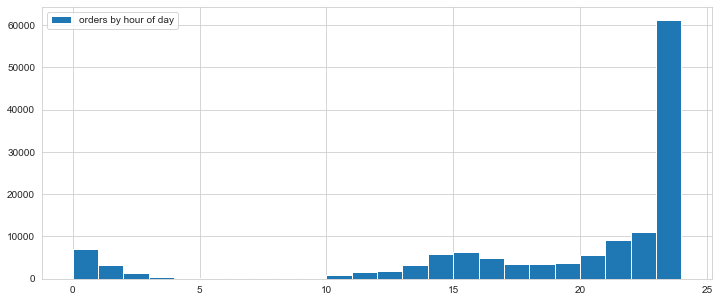

In [64]:
orders_filtered.loc[:, 'delivered_time'] = pd.to_datetime(orders_filtered['delivered_time'], errors='coerce')
orders_filtered['delivery_time'] = 24
X1 = []
X2 = []
Y = []
for i in range(0, 24):
    df = orders_filtered[orders_filtered['delivered_time'].dt.hour==i]
    #print(i,len(df))
    orders_filtered.loc[df.index, 'delivery_time'] = i
    Y.extend(orders_filtered.loc[df.index, 'delivery_time'].values)
    X1.extend(orders_filtered.loc[df.index, 'item_count'].values)
    X2.extend(orders_filtered.loc[df.index, 'grand_total'].values)

orders_filtered['delivery_time'].hist(bins=24, label='orders by hour of day')
plt.legend();

In [65]:
X = np.asarray([X2]).T
print(X.shape)


Y = np.asarray(Y)
print(Y.shape)

(85741, 1)
(85741,)


In [66]:
orders_filtered['delivery_time'].value_counts(dropna=False)

24    49562
23    11630
22    10986
21     9132
0      6941
15     6277
14     5785
20     5553
16     5033
19     3835
17     3575
18     3437
1      3313
13     3244
12     1914
11     1621
2      1316
10      855
3       490
9       209
8       184
7       144
4       102
6        89
5        76
Name: delivery_time, dtype: int64

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X,Y)

KNeighborsClassifier(n_neighbors=50)

In [68]:
X1 = []
X2 = []
df = orders_filtered[orders_filtered['delivered_time'].dt.hour==23]
X1.extend(orders_filtered.loc[df.index, 'item_count'].values)
X2.extend(orders_filtered.loc[df.index, 'grand_total'].values)
X_ = np.asarray([X2]).T

In [69]:
pred = knn.predict(X_)
print(pred)

[21 14 22 ... 15 22  0]


In [70]:
#Use KNN to fill delivery_hour

df = orders_filtered[orders_filtered['delivery_time']==24]
#orders_filtered.loc[df.index, 'delivery_hour'] = i
X_forcast = np.asarray([df['grand_total'].values]).T
print(X_forcast.shape)
pred = knn.predict(X_forcast)
print(pred.shape)
orders_filtered.loc[df.index,'delivery_time']=pred

(49562, 1)
(49562,)


In [71]:
orders_filtered['delivery_time'].value_counts()

22    26146
21    19537
23    19211
0     10072
14     9875
15     9617
20     7462
16     6274
19     4778
17     4290
13     3518
18     3448
1      3372
12     2300
11     1865
2      1316
10      928
3       490
9       209
8       184
7       144
4       102
6        89
5        76
Name: delivery_time, dtype: int64

In [72]:
orders_filtered.keys()

Index(['customer_id', 'item_count', 'grand_total',
       'promo_code_discount_percentage', 'is_favorite', 'is_rated',
       'vendor_rating', 'deliverydistance', 'preparationtime', 'delivery_time',
       'driver_accepted_time', 'delivered_time', 'vendor_id',
       'LOCATION_NUMBER', 'LOCATION_TYPE'],
      dtype='object')

In [73]:
key_to_remove = ['driver_accepted_time', 'delivered_time']

orders_filtered = orders_filtered.drop(key_to_remove, axis=1)

In [74]:
orders_filtered

,customer_id,item_count,grand_total,promo_code_discount_percentage,is_favorite,is_rated,vendor_rating,deliverydistance,preparationtime,delivery_time,vendor_id,LOCATION_NUMBER,LOCATION_TYPE
0,92PEE24,1.0,7.6,0.0,0,No,NaN,0.00,55.233006,21,105,0,NaN
1,QS68UD8,1.0,8.7,0.0,0,No,NaN,0.00,55.233006,22,294,0,Work
2,MB7VY5F,2.0,14.4,0.0,0,No,NaN,0.00,55.233006,21,83,0,NaN
3,KDJ951Y,1.0,7.1,0.0,0,No,NaN,0.00,55.233006,17,90,0,Home
4,BAL0RVT,4.0,27.2,0.0,0,No,NaN,0.00,55.233006,22,83,0,Work
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135298,L6LFY6H,1.0,13.3,0.0,No,No,NaN,1.75,40.000000,0,67,0,NaN
135299,2GMMVGI,3.0,9.5,0.0,No,Yes,5.0,12.81,60.000000,1,79,0,Work
135300,LYTAAV0,4.0,18.2,0.0,No,No,NaN,11.15,45.000000,0,28,2,Other
135301,NEV9A5D,3.0,7.7,0.0,No,No,NaN,2.29,35.000000,0,841,0,NaN


In [75]:
orders_filtered['is_favorite'].value_counts(dropna=False)

No     98449
0      35195
Yes     1659
Name: is_favorite, dtype: int64

In [76]:
orders_filtered['is_rated'].value_counts(dropna=False)

No     115194
Yes     20109
Name: is_rated, dtype: int64

In [77]:
orders_filtered['is_rated'] = orders_filtered['is_rated'].fillna(0)
orders_filtered['is_favorite'] = orders_filtered['is_favorite'].fillna(0)

In [78]:
orders_filtered['is_rated'].value_counts(dropna=False)

No     115194
Yes     20109
Name: is_rated, dtype: int64

In [79]:
orders_filtered['vendor_rating'].value_counts(dropna=False)

NaN    90083
0.0    25175
5.0    14212
4.0     2748
3.0     1426
1.0     1029
2.0      630
Name: vendor_rating, dtype: int64

In [80]:
orders_filtered['vendor_rating']=orders_filtered['vendor_rating'].fillna(5.0)

In [81]:
orders_filtered

,customer_id,item_count,grand_total,promo_code_discount_percentage,is_favorite,is_rated,vendor_rating,deliverydistance,preparationtime,delivery_time,vendor_id,LOCATION_NUMBER,LOCATION_TYPE
0,92PEE24,1.0,7.6,0.0,0,No,5.0,0.00,55.233006,21,105,0,NaN
1,QS68UD8,1.0,8.7,0.0,0,No,5.0,0.00,55.233006,22,294,0,Work
2,MB7VY5F,2.0,14.4,0.0,0,No,5.0,0.00,55.233006,21,83,0,NaN
3,KDJ951Y,1.0,7.1,0.0,0,No,5.0,0.00,55.233006,17,90,0,Home
4,BAL0RVT,4.0,27.2,0.0,0,No,5.0,0.00,55.233006,22,83,0,Work
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135298,L6LFY6H,1.0,13.3,0.0,No,No,5.0,1.75,40.000000,0,67,0,NaN
135299,2GMMVGI,3.0,9.5,0.0,No,Yes,5.0,12.81,60.000000,1,79,0,Work
135300,LYTAAV0,4.0,18.2,0.0,No,No,5.0,11.15,45.000000,0,28,2,Other
135301,NEV9A5D,3.0,7.7,0.0,No,No,5.0,2.29,35.000000,0,841,0,NaN


In [82]:
orders_filtered['vendor_id']

0         105
1         294
2          83
3          90
4          83
         ... 
135298     67
135299     79
135300     28
135301    841
135302     79
Name: vendor_id, Length: 135303, dtype: int64

In [83]:
orders_filtered['customer_id']

0         92PEE24
1         QS68UD8
2         MB7VY5F
3         KDJ951Y
4         BAL0RVT
           ...   
135298    L6LFY6H
135299    2GMMVGI
135300    LYTAAV0
135301    NEV9A5D
135302    77KCRC1
Name: customer_id, Length: 135303, dtype: object

In [84]:
#restaurant side/;
restaurant_df = orders_filtered.copy().groupby('vendor_id')

In [85]:
orders_filtered['is_favorite']

0          0
1          0
2          0
3          0
4          0
          ..
135298    No
135299    No
135300    No
135301    No
135302    No
Name: is_favorite, Length: 135303, dtype: object

In [86]:
restaurant_side = restaurant_df['item_count','grand_total','promo_code_discount_percentage','is_favorite','is_rated','vendor_rating','preparationtime'].mean()
restaurant_side

<ipython-input-86-4adbc85ebda7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  restaurant_side = restaurant_df['item_count','grand_total','promo_code_discount_percentage','is_favorite','is_rated','vendor_rating','preparationtime'].mean()


,item_count,grand_total,promo_code_discount_percentage,vendor_rating,preparationtime
vendor_id,,,,,
4,3.108527,16.350257,0.000000,3.949462,49.477176
13,2.184566,17.902189,0.000000,3.997264,48.825998
20,2.655098,23.338500,0.000000,4.040328,53.098186
23,2.542363,23.201848,0.000000,4.180435,50.219764
28,3.093899,12.937671,0.016265,3.682498,46.188147
...,...,...,...,...,...
849,1.988754,11.483037,0.046860,4.785380,36.331271
855,2.037304,12.058965,0.030084,4.799037,36.306497
856,2.064516,12.232638,0.094877,4.823529,36.319228


In [87]:
def get_positive_freq(x):
    s = x.value_counts()
    if len(s)>1:
        return s.values[1]
    else:
        return 0
    
def get_positive_percentage(x):
    s = x.value_counts()
    if len(s)>1:
        return s.values[1]/(s.values[1]+s.values[0])
    else:
        return 0

In [88]:
rate = restaurant_df['is_favorite','is_rated'].agg(get_positive_freq)
rate

<ipython-input-88-422ca3eaae71>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rate = restaurant_df['is_favorite','is_rated'].agg(get_positive_freq)


,is_favorite,is_rated
vendor_id,,
4,784,276
13,273,115
20,644,201
23,314,122
28,324,225
...,...,...
849,43,277
855,29,213
856,12,243


In [89]:
rate2 = restaurant_df['is_favorite','is_rated'].agg(get_positive_percentage)
rate2

<ipython-input-89-ab1acec25325>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rate2 = restaurant_df['is_favorite','is_rated'].agg(get_positive_percentage)


,is_favorite,is_rated
vendor_id,,
4,0.370686,0.129153
13,0.377072,0.157319
20,0.411239,0.126654
23,0.343921,0.132609
28,0.214428,0.146389
...,...,...
849,0.040300,0.259606
855,0.034898,0.256318
856,0.011385,0.230550


In [90]:
restaurant_side['is_favorite']=rate['is_favorite']
restaurant_side['is_rated']=rate['is_rated']
restaurant_side['is_favorite_percentage']=rate2['is_favorite']
restaurant_side['is_rated_percentage']=rate2['is_rated']

In [91]:
restaurant_side

,item_count,grand_total,promo_code_discount_percentage,vendor_rating,preparationtime,is_favorite,is_rated,is_favorite_percentage,is_rated_percentage
vendor_id,,,,,,,,,
4,3.108527,16.350257,0.000000,3.949462,49.477176,784,276,0.370686,0.129153
13,2.184566,17.902189,0.000000,3.997264,48.825998,273,115,0.377072,0.157319
20,2.655098,23.338500,0.000000,4.040328,53.098186,644,201,0.411239,0.126654
23,2.542363,23.201848,0.000000,4.180435,50.219764,314,122,0.343921,0.132609
28,3.093899,12.937671,0.016265,3.682498,46.188147,324,225,0.214428,0.146389
...,...,...,...,...,...,...,...,...,...
849,1.988754,11.483037,0.046860,4.785380,36.331271,43,277,0.040300,0.259606
855,2.037304,12.058965,0.030084,4.799037,36.306497,29,213,0.034898,0.256318
856,2.064516,12.232638,0.094877,4.823529,36.319228,12,243,0.011385,0.230550


In [92]:
vendors

,id,authentication_id,latitude,longitude,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,...,open_close_flags,vendor_tag,vendor_tag_name,one_click_vendor,country_id,city_id,created_at,updated_at,device_type,display_orders
0,4,118597.0,-0.588596,0.754434,Restaurants,2.0,0.0,6.0,1.0,11:00AM-11:30PM,...,1.0,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",Y,1.0,1.0,2018-01-30 14:42:04,2020-04-07 15:12:43,3,1
1,13,118608.0,-0.471654,0.744470,Restaurants,2.0,0.7,5.0,1.0,08:30AM-10:30PM,...,1.0,"4,41,51,34,27,15,24,16,28","Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",Y,1.0,1.0,2018-05-03 12:32:06,2020-04-05 20:46:03,3,1
2,20,118616.0,-0.407527,0.643681,Restaurants,2.0,0.0,8.0,1.0,08:00AM-10:45PM,...,1.0,"4,8,91,10","Breakfast,Desserts,Free Delivery,Indian",Y,1.0,1.0,2018-05-04 22:28:22,2020-04-07 16:35:55,3,1
3,23,118619.0,-0.585385,0.753811,Restaurants,2.0,0.0,5.0,1.0,10:59AM-10:30PM,...,1.0,"5,8,30,24","Burgers,Desserts,Fries,Salads",Y,1.0,1.0,2018-05-06 19:20:48,2020-04-02 00:56:17,3,1
4,28,118624.0,0.480602,0.552850,Restaurants,2.0,0.7,15.0,1.0,11:00AM-11:45PM,...,1.0,5,Burgers,Y,1.0,1.0,2018-05-17 22:12:38,2020-04-05 15:57:41,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,849,130455.0,-1.588060,-0.066441,Restaurants,2.0,0.0,10.0,1.0,NaN,...,1.0,"1,4,5,6,8,91,30,43,48,24","American,Breakfast,Burgers,Cafe,Desserts,Free ...",Y,1.0,1.0,2019-12-21 12:47:39,2020-04-07 20:01:33,3,1
96,855,130463.0,2.145206,0.745025,Restaurants,2.0,0.0,8.0,1.0,NaN,...,1.0,"1,5,8,91,30,48,24","American,Burgers,Desserts,Free Delivery,Fries,...",Y,1.0,1.0,2019-12-21 13:02:32,2020-04-07 01:50:41,3,1
97,856,130464.0,0.251469,0.483632,Restaurants,2.0,0.0,7.0,1.0,NaN,...,1.0,"1,4,5,6,8,91,30,43,48,24","American,Breakfast,Burgers,Cafe,Desserts,Free ...",Y,1.0,1.0,2019-12-21 13:04:34,2020-04-06 23:53:16,3,1
98,858,130468.0,0.019817,0.587087,Restaurants,2.0,0.0,3.0,1.0,NaN,...,1.0,"1,4,5,6,8,91,30,43,48,24","American,Breakfast,Burgers,Cafe,Desserts,Free ...",Y,1.0,1.0,2019-12-21 13:12:09,2020-04-07 14:26:08,3,1


In [93]:
vendors.keys()

Index(['id', 'authentication_id', 'latitude', 'longitude',
       'vendor_category_en', 'vendor_category_id', 'delivery_charge',
       'serving_distance', 'is_open', 'OpeningTime', 'OpeningTime2',
       'prepration_time', 'commission', 'is_akeed_delivering',
       'discount_percentage', 'status', 'verified', 'rank', 'language',
       'vendor_rating', 'sunday_from_time1', 'sunday_to_time1',
       'sunday_from_time2', 'sunday_to_time2', 'monday_from_time1',
       'monday_to_time1', 'monday_from_time2', 'monday_to_time2',
       'tuesday_from_time1', 'tuesday_to_time1', 'tuesday_from_time2',
       'tuesday_to_time2', 'wednesday_from_time1', 'wednesday_to_time1',
       'wednesday_from_time2', 'wednesday_to_time2', 'thursday_from_time1',
       'thursday_to_time1', 'thursday_from_time2', 'thursday_to_time2',
       'friday_from_time1', 'friday_to_time1', 'friday_from_time2',
       'friday_to_time2', 'saturday_from_time1', 'saturday_to_time1',
       'saturday_from_time2', 'saturday

In [94]:
vendor_drop_list = ['authentication_id','vendor_category_en','sunday_from_time1', 'sunday_to_time1',
       'sunday_from_time2', 'sunday_to_time2', 'monday_from_time1',
       'monday_to_time1', 'monday_from_time2', 'monday_to_time2',
       'tuesday_from_time1', 'tuesday_to_time1', 'tuesday_from_time2',
       'tuesday_to_time2', 'wednesday_from_time1', 'wednesday_to_time1',
       'wednesday_from_time2', 'wednesday_to_time2', 'thursday_from_time1','is_akeed_delivering',
       'thursday_to_time1', 'thursday_from_time2', 'thursday_to_time2','OpeningTime','OpeningTime2',
       'friday_from_time1', 'friday_to_time1', 'friday_from_time2','open_close_flags','primary_tags','vendor_tag_name',
       'friday_to_time2', 'saturday_from_time1', 'saturday_to_time1','serving_distance','is_open','commission','language',
       'saturday_from_time2', 'saturday_to_time2','country_id','created_at', 'updated_at','device_type','display_orders']

In [95]:
vendors_filtered = vendors.drop(vendor_drop_list, axis=1)

In [96]:
vendors_filtered

,id,latitude,longitude,vendor_category_id,delivery_charge,prepration_time,discount_percentage,status,verified,rank,vendor_rating,vendor_tag,one_click_vendor,city_id
0,4,-0.588596,0.754434,2.0,0.0,15,0.0,1.0,1,11,4.4,"2,4,5,8,91,22,12,24,16,23",Y,1.0
1,13,-0.471654,0.744470,2.0,0.7,14,0.0,1.0,1,11,4.7,"4,41,51,34,27,15,24,16,28",Y,1.0
2,20,-0.407527,0.643681,2.0,0.0,19,0.0,1.0,1,1,4.5,"4,8,91,10",Y,1.0
3,23,-0.585385,0.753811,2.0,0.0,16,0.0,1.0,1,11,4.5,"5,8,30,24",Y,1.0
4,28,0.480602,0.552850,2.0,0.7,10,0.0,1.0,1,11,4.4,5,Y,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,849,-1.588060,-0.066441,2.0,0.0,10,0.0,1.0,1,1,4.1,"1,4,5,6,8,91,30,43,48,24",Y,1.0
96,855,2.145206,0.745025,2.0,0.0,10,0.0,1.0,1,1,4.2,"1,5,8,91,30,48,24",Y,1.0
97,856,0.251469,0.483632,2.0,0.0,10,0.0,1.0,1,11,4.3,"1,4,5,6,8,91,30,43,48,24",Y,1.0
98,858,0.019817,0.587087,2.0,0.0,10,0.0,1.0,1,11,4.2,"1,4,5,6,8,91,30,43,48,24",Y,1.0


In [97]:
vendors_filtered['rank'].value_counts()

11    89
1     11
Name: rank, dtype: int64

In [98]:

c = vendors_filtered['vendor_tag'].value_counts()
min_tag = 10000
max_tag = -1
for i in range(len(c)):
    l = [int(k) for k in c.index[i].split(',')]
    min_tag = min(min_tag,min(l))
    max_tag = max(max_tag,max(l))

In [99]:
vendors_filtered['vendor_tag'] = vendors_filtered['vendor_tag'].fillna('-1')

for tag_num in range(min_tag,max_tag+1):
    vendors_filtered['tag_'+str(tag_num)]=0
    for i in range(len(vendors_filtered)):
        #print(type(vendors_filtered.loc[i, 'vendor_tag']))
        if tag_num in [int(k) for k in vendors_filtered.loc[i, 'vendor_tag'].split(',')]:
            vendors_filtered.loc[i, 'tag_'+str(tag_num)]=1
vendors_filtered = vendors_filtered.drop(['vendor_tag'], axis=1)

In [100]:
vendors_filtered.loc[:,:]

,id,latitude,longitude,vendor_category_id,delivery_charge,prepration_time,discount_percentage,status,verified,rank,...,tag_82,tag_83,tag_84,tag_85,tag_86,tag_87,tag_88,tag_89,tag_90,tag_91
0,4,-0.588596,0.754434,2.0,0.0,15,0.0,1.0,1,11,...,0,0,0,0,0,0,0,0,0,1
1,13,-0.471654,0.744470,2.0,0.7,14,0.0,1.0,1,11,...,0,0,0,0,0,0,0,0,0,0
2,20,-0.407527,0.643681,2.0,0.0,19,0.0,1.0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,23,-0.585385,0.753811,2.0,0.0,16,0.0,1.0,1,11,...,0,0,0,0,0,0,0,0,0,0
4,28,0.480602,0.552850,2.0,0.7,10,0.0,1.0,1,11,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,849,-1.588060,-0.066441,2.0,0.0,10,0.0,1.0,1,1,...,0,0,0,0,0,0,0,0,0,1
96,855,2.145206,0.745025,2.0,0.0,10,0.0,1.0,1,1,...,0,0,0,0,0,0,0,0,0,1
97,856,0.251469,0.483632,2.0,0.0,10,0.0,1.0,1,11,...,0,0,0,0,0,0,0,0,0,1
98,858,0.019817,0.587087,2.0,0.0,10,0.0,1.0,1,11,...,0,0,0,0,0,0,0,0,0,1


In [101]:

restaurant_side

,item_count,grand_total,promo_code_discount_percentage,vendor_rating,preparationtime,is_favorite,is_rated,is_favorite_percentage,is_rated_percentage
vendor_id,,,,,,,,,
4,3.108527,16.350257,0.000000,3.949462,49.477176,784,276,0.370686,0.129153
13,2.184566,17.902189,0.000000,3.997264,48.825998,273,115,0.377072,0.157319
20,2.655098,23.338500,0.000000,4.040328,53.098186,644,201,0.411239,0.126654
23,2.542363,23.201848,0.000000,4.180435,50.219764,314,122,0.343921,0.132609
28,3.093899,12.937671,0.016265,3.682498,46.188147,324,225,0.214428,0.146389
...,...,...,...,...,...,...,...,...,...
849,1.988754,11.483037,0.046860,4.785380,36.331271,43,277,0.040300,0.259606
855,2.037304,12.058965,0.030084,4.799037,36.306497,29,213,0.034898,0.256318
856,2.064516,12.232638,0.094877,4.823529,36.319228,12,243,0.011385,0.230550


In [102]:
restaurant_side['vendor_rating2']=restaurant_side.loc[:,'vendor_rating']
restaurant_side['favorite_by']=restaurant_side['is_favorite']
restaurant_side['rated_by']=restaurant_side['is_rated']
restaurant_side['favorite_percentage']=restaurant_side['is_favorite_percentage']
restaurant_side['rated_percentage']=restaurant_side['is_rated_percentage']
restaurant_side['average_price']=restaurant_side['vendor_rating']
restaurant_side['favorite_by']=restaurant_side['grand_total']
restaurant_side['average_item_sold']=restaurant_side['item_count']
keep = ['average_item_sold','favorite_by','average_price','rated_percentage','favorite_percentage','rated_by','favorite_by','vendor_rating2']
to_drop = [k for k in restaurant_side.keys() if k not in keep]
restaurant_side = restaurant_side.drop(to_drop,axis=1)

In [103]:
restaurant_side

,vendor_rating2,favorite_by,rated_by,favorite_percentage,rated_percentage,average_price,average_item_sold
vendor_id,,,,,,,
4,3.949462,16.350257,276,0.370686,0.129153,3.949462,3.108527
13,3.997264,17.902189,115,0.377072,0.157319,3.997264,2.184566
20,4.040328,23.338500,201,0.411239,0.126654,4.040328,2.655098
23,4.180435,23.201848,122,0.343921,0.132609,4.180435,2.542363
28,3.682498,12.937671,225,0.214428,0.146389,3.682498,3.093899
...,...,...,...,...,...,...,...
849,4.785380,11.483037,277,0.040300,0.259606,4.785380,1.988754
855,4.799037,12.058965,213,0.034898,0.256318,4.799037,2.037304
856,4.823529,12.232638,243,0.011385,0.230550,4.823529,2.064516


In [104]:
restaurant = pd.merge(restaurant_side,vendors_filtered,left_on='vendor_id', right_on='id')

In [105]:
vendor_id = restaurant['id']
restaurant = restaurant.drop(['id'],axis=1)
restaurant.insert(0,'vendor_id',vendor_id)

# Restaurant Representation

In [107]:
restaurant

,vendor_id,vendor_rating2,favorite_by,rated_by,favorite_percentage,rated_percentage,average_price,average_item_sold,latitude,longitude,...,tag_82,tag_83,tag_84,tag_85,tag_86,tag_87,tag_88,tag_89,tag_90,tag_91
0,4,3.949462,16.350257,276,0.370686,0.129153,3.949462,3.108527,-0.588596,0.754434,...,0,0,0,0,0,0,0,0,0,1
1,13,3.997264,17.902189,115,0.377072,0.157319,3.997264,2.184566,-0.471654,0.744470,...,0,0,0,0,0,0,0,0,0,0
2,20,4.040328,23.338500,201,0.411239,0.126654,4.040328,2.655098,-0.407527,0.643681,...,0,0,0,0,0,0,0,0,0,1
3,23,4.180435,23.201848,122,0.343921,0.132609,4.180435,2.542363,-0.585385,0.753811,...,0,0,0,0,0,0,0,0,0,0
4,28,3.682498,12.937671,225,0.214428,0.146389,3.682498,3.093899,0.480602,0.552850,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,849,4.785380,11.483037,277,0.040300,0.259606,4.785380,1.988754,-1.588060,-0.066441,...,0,0,0,0,0,0,0,0,0,1
96,855,4.799037,12.058965,213,0.034898,0.256318,4.799037,2.037304,2.145206,0.745025,...,0,0,0,0,0,0,0,0,0,1
97,856,4.823529,12.232638,243,0.011385,0.230550,4.823529,2.064516,0.251469,0.483632,...,0,0,0,0,0,0,0,0,0,1
98,858,4.836047,11.285465,187,0.016279,0.217442,4.836047,1.966279,0.019817,0.587087,...,0,0,0,0,0,0,0,0,0,1


In [108]:
for i in restaurant.keys():
    print(i)

vendor_id
vendor_rating2
favorite_by
rated_by
favorite_percentage
rated_percentage
average_price
average_item_sold
latitude
longitude
vendor_category_id
delivery_charge
prepration_time
discount_percentage
status
verified
rank
vendor_rating
one_click_vendor
city_id
tag_1
tag_2
tag_3
tag_4
tag_5
tag_6
tag_7
tag_8
tag_9
tag_10
tag_11
tag_12
tag_13
tag_14
tag_15
tag_16
tag_17
tag_18
tag_19
tag_20
tag_21
tag_22
tag_23
tag_24
tag_25
tag_26
tag_27
tag_28
tag_29
tag_30
tag_31
tag_32
tag_33
tag_34
tag_35
tag_36
tag_37
tag_38
tag_39
tag_40
tag_41
tag_42
tag_43
tag_44
tag_45
tag_46
tag_47
tag_48
tag_49
tag_50
tag_51
tag_52
tag_53
tag_54
tag_55
tag_56
tag_57
tag_58
tag_59
tag_60
tag_61
tag_62
tag_63
tag_64
tag_65
tag_66
tag_67
tag_68
tag_69
tag_70
tag_71
tag_72
tag_73
tag_74
tag_75
tag_76
tag_77
tag_78
tag_79
tag_80
tag_81
tag_82
tag_83
tag_84
tag_85
tag_86
tag_87
tag_88
tag_89
tag_90
tag_91


In [169]:
customers = pd.read_csv(os.path.join(root_dir, 'train_customers.csv'))

In [170]:
customers

,akeed_customer_id,gender,dob,status,verified,language,created_at,updated_at
0,TCHWPBT,Male,NaN,1,1,EN,2018-02-07 19:16:23,2018-02-07 19:16:23
1,ZGFSYCZ,Male,NaN,1,1,EN,2018-02-09 12:04:42,2018-02-09 12:04:41
2,S2ALZFL,Male,NaN,0,1,EN,2018-03-14 18:31:43,2018-03-14 18:31:42
3,952DBJQ,Male,NaN,1,1,EN,2018-03-15 19:47:07,2018-03-15 19:47:07
4,1IX6FXS,Male,NaN,1,1,EN,2018-03-15 19:57:01,2018-03-15 19:57:01
...,...,...,...,...,...,...,...,...
34669,JAI79PE,NaN,NaN,1,1,NaN,2020-03-03 13:01:13,2020-03-03 13:02:21
34670,TR75VFL,NaN,NaN,1,1,NaN,2020-03-03 13:22:35,2020-03-03 13:22:41
34671,SQMJ08H,NaN,NaN,1,1,NaN,2020-03-03 13:24:27,2020-03-03 13:24:44
34672,9LW9CHN,NaN,NaN,1,1,NaN,2020-03-03 13:24:28,2020-03-03 13:28:00


In [171]:
customers

,akeed_customer_id,gender,dob,status,verified,language,created_at,updated_at
0,TCHWPBT,Male,NaN,1,1,EN,2018-02-07 19:16:23,2018-02-07 19:16:23
1,ZGFSYCZ,Male,NaN,1,1,EN,2018-02-09 12:04:42,2018-02-09 12:04:41
2,S2ALZFL,Male,NaN,0,1,EN,2018-03-14 18:31:43,2018-03-14 18:31:42
3,952DBJQ,Male,NaN,1,1,EN,2018-03-15 19:47:07,2018-03-15 19:47:07
4,1IX6FXS,Male,NaN,1,1,EN,2018-03-15 19:57:01,2018-03-15 19:57:01
...,...,...,...,...,...,...,...,...
34669,JAI79PE,NaN,NaN,1,1,NaN,2020-03-03 13:01:13,2020-03-03 13:02:21
34670,TR75VFL,NaN,NaN,1,1,NaN,2020-03-03 13:22:35,2020-03-03 13:22:41
34671,SQMJ08H,NaN,NaN,1,1,NaN,2020-03-03 13:24:27,2020-03-03 13:24:44
34672,9LW9CHN,NaN,NaN,1,1,NaN,2020-03-03 13:24:28,2020-03-03 13:28:00


In [172]:
orders_filtered.keys()

Index(['customer_id', 'item_count', 'grand_total',
       'promo_code_discount_percentage', 'is_favorite', 'is_rated',
       'vendor_rating', 'deliverydistance', 'preparationtime', 'delivery_time',
       'vendor_id', 'LOCATION_NUMBER', 'LOCATION_TYPE'],
      dtype='object')

In [173]:
train_full

,customer_id,gender,status_x,verified_x,created_at_x,updated_at_x,location_number,location_type,latitude_x,longitude_x,...,country_id,city_id,created_at_y,updated_at_y,device_type,display_orders,location_number_obj,id_obj,CID X LOC_NUM X VENDOR,target
0,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.20,...,1.0,1.0,2018-01-30 14:42:04,2020-04-07 15:12:43,3,1,0,4,TCHWPBT X 0 X 4,0
1,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.20,...,1.0,1.0,2018-05-03 12:32:06,2020-04-05 20:46:03,3,1,0,13,TCHWPBT X 0 X 13,0
2,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.20,...,1.0,1.0,2018-05-04 22:28:22,2020-04-07 16:35:55,3,1,0,20,TCHWPBT X 0 X 20,0
3,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.20,...,1.0,1.0,2018-05-06 19:20:48,2020-04-02 00:56:17,3,1,0,23,TCHWPBT X 0 X 23,0
4,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.20,...,1.0,1.0,2018-05-17 22:12:38,2020-04-05 15:57:41,3,1,0,28,TCHWPBT X 0 X 28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5802395,LBMRK7A,NaN,1,1,2020-03-03 13:31:52,2020-03-03 13:32:09,0,Other,19.83,3.03,...,1.0,1.0,2019-12-21 12:47:39,2020-04-07 20:01:33,3,1,0,849,LBMRK7A X 0 X 849,0
5802396,LBMRK7A,NaN,1,1,2020-03-03 13:31:52,2020-03-03 13:32:09,0,Other,19.83,3.03,...,1.0,1.0,2019-12-21 13:02:32,2020-04-07 01:50:41,3,1,0,855,LBMRK7A X 0 X 855,0
5802397,LBMRK7A,NaN,1,1,2020-03-03 13:31:52,2020-03-03 13:32:09,0,Other,19.83,3.03,...,1.0,1.0,2019-12-21 13:04:34,2020-04-06 23:53:16,3,1,0,856,LBMRK7A X 0 X 856,0
5802398,LBMRK7A,NaN,1,1,2020-03-03 13:31:52,2020-03-03 13:32:09,0,Other,19.83,3.03,...,1.0,1.0,2019-12-21 13:12:09,2020-04-07 14:26:08,3,1,0,858,LBMRK7A X 0 X 858,0


In [174]:
train_full.keys()

Index(['customer_id', 'gender', 'status_x', 'verified_x', 'created_at_x',
       'updated_at_x', 'location_number', 'location_type', 'latitude_x',
       'longitude_x', 'id', 'authentication_id', 'latitude_y', 'longitude_y',
       'vendor_category_en', 'vendor_category_id', 'delivery_charge',
       'serving_distance', 'is_open', 'OpeningTime', 'OpeningTime2',
       'prepration_time', 'commission', 'is_akeed_delivering',
       'discount_percentage', 'status_y', 'verified_y', 'rank', 'language',
       'vendor_rating', 'sunday_from_time1', 'sunday_to_time1',
       'sunday_from_time2', 'sunday_to_time2', 'monday_from_time1',
       'monday_to_time1', 'monday_from_time2', 'monday_to_time2',
       'tuesday_from_time1', 'tuesday_to_time1', 'tuesday_from_time2',
       'tuesday_to_time2', 'wednesday_from_time1', 'wednesday_to_time1',
       'wednesday_from_time2', 'wednesday_to_time2', 'thursday_from_time1',
       'thursday_to_time1', 'thursday_from_time2', 'thursday_to_time2',
       

# We should use 'latitude_x','longitude_x','city_id' to filter out restaurants that are too far. Then make recommendation based on users preferrence

In [382]:
keep = ['customer_id','gender','location_type','location_number','latitude_x','longitude_x','city_id','vendor_tag',]
to_drop = [k for k in train_full.keys() if k not in keep]
customer_basic = train_full.drop(to_drop,axis=1)

In [383]:
customer_basic

,customer_id,gender,location_number,location_type,latitude_x,longitude_x,vendor_tag,city_id
0,TCHWPBT,Male,0,Work,-96.44,-67.20,"2,4,5,8,91,22,12,24,16,23",1.0
1,TCHWPBT,Male,0,Work,-96.44,-67.20,"4,41,51,34,27,15,24,16,28",1.0
2,TCHWPBT,Male,0,Work,-96.44,-67.20,"4,8,91,10",1.0
3,TCHWPBT,Male,0,Work,-96.44,-67.20,"5,8,30,24",1.0
4,TCHWPBT,Male,0,Work,-96.44,-67.20,5,1.0
...,...,...,...,...,...,...,...,...
5802395,LBMRK7A,NaN,0,Other,19.83,3.03,"1,4,5,6,8,91,30,43,48,24",1.0
5802396,LBMRK7A,NaN,0,Other,19.83,3.03,"1,5,8,91,30,48,24",1.0
5802397,LBMRK7A,NaN,0,Other,19.83,3.03,"1,4,5,6,8,91,30,43,48,24",1.0
5802398,LBMRK7A,NaN,0,Other,19.83,3.03,"1,4,5,6,8,91,30,43,48,24",1.0


In [384]:
kw = ["Male",'Female']
for i,k in enumerate(kw):
    df = customer_basic[customer_basic['gender']==k]
    customer_basic.loc[df.index,'gender']=i
df = customer_basic[customer_basic['gender'].isna()]
customer_basic.loc[df.index,'gender']=3

In [385]:
customer_basic

,customer_id,gender,location_number,location_type,latitude_x,longitude_x,vendor_tag,city_id
0,TCHWPBT,0,0,Work,-96.44,-67.20,"2,4,5,8,91,22,12,24,16,23",1.0
1,TCHWPBT,0,0,Work,-96.44,-67.20,"4,41,51,34,27,15,24,16,28",1.0
2,TCHWPBT,0,0,Work,-96.44,-67.20,"4,8,91,10",1.0
3,TCHWPBT,0,0,Work,-96.44,-67.20,"5,8,30,24",1.0
4,TCHWPBT,0,0,Work,-96.44,-67.20,5,1.0
...,...,...,...,...,...,...,...,...
5802395,LBMRK7A,3,0,Other,19.83,3.03,"1,4,5,6,8,91,30,43,48,24",1.0
5802396,LBMRK7A,3,0,Other,19.83,3.03,"1,5,8,91,30,48,24",1.0
5802397,LBMRK7A,3,0,Other,19.83,3.03,"1,4,5,6,8,91,30,43,48,24",1.0
5802398,LBMRK7A,3,0,Other,19.83,3.03,"1,4,5,6,8,91,30,43,48,24",1.0


In [386]:
kw = ["Home",'Work','Other']
for i,k in enumerate(kw):
    df = customer_basic[customer_basic['location_type']==k]
    customer_basic.loc[df.index,'location_type']=i
df = customer_basic[customer_basic['location_type'].isna()]
customer_basic.loc[df.index,'location_type']=2

In [387]:
customer_basic

,customer_id,gender,location_number,location_type,latitude_x,longitude_x,vendor_tag,city_id
0,TCHWPBT,0,0,1,-96.44,-67.20,"2,4,5,8,91,22,12,24,16,23",1.0
1,TCHWPBT,0,0,1,-96.44,-67.20,"4,41,51,34,27,15,24,16,28",1.0
2,TCHWPBT,0,0,1,-96.44,-67.20,"4,8,91,10",1.0
3,TCHWPBT,0,0,1,-96.44,-67.20,"5,8,30,24",1.0
4,TCHWPBT,0,0,1,-96.44,-67.20,5,1.0
...,...,...,...,...,...,...,...,...
5802395,LBMRK7A,3,0,2,19.83,3.03,"1,4,5,6,8,91,30,43,48,24",1.0
5802396,LBMRK7A,3,0,2,19.83,3.03,"1,5,8,91,30,48,24",1.0
5802397,LBMRK7A,3,0,2,19.83,3.03,"1,4,5,6,8,91,30,43,48,24",1.0
5802398,LBMRK7A,3,0,2,19.83,3.03,"1,4,5,6,8,91,30,43,48,24",1.0


In [388]:
customer_basic['location_number'].value_counts(dropna=False)

0     3452300
1     1345800
2      535400
3      245900
4      112500
5       48900
6       24000
7       12700
8        7500
9        5100
10       3300
11       2000
12       1400
13       1200
14       1200
15        700
16        500
17        400
18        400
19        200
20        100
21        100
22        100
23        100
24        100
25        100
26        100
27        100
28        100
29        100
Name: location_number, dtype: int64

In [389]:
customer_basic['gender'] = pd.to_numeric(customer_basic['gender'])
customer_basic['location_number'] = pd.to_numeric(customer_basic['location_number'])
customer_basic['location_type'] = pd.to_numeric(customer_basic['location_type'])
customer_basic

,customer_id,gender,location_number,location_type,latitude_x,longitude_x,vendor_tag,city_id
0,TCHWPBT,0,0,1,-96.44,-67.20,"2,4,5,8,91,22,12,24,16,23",1.0
1,TCHWPBT,0,0,1,-96.44,-67.20,"4,41,51,34,27,15,24,16,28",1.0
2,TCHWPBT,0,0,1,-96.44,-67.20,"4,8,91,10",1.0
3,TCHWPBT,0,0,1,-96.44,-67.20,"5,8,30,24",1.0
4,TCHWPBT,0,0,1,-96.44,-67.20,5,1.0
...,...,...,...,...,...,...,...,...
5802395,LBMRK7A,3,0,2,19.83,3.03,"1,4,5,6,8,91,30,43,48,24",1.0
5802396,LBMRK7A,3,0,2,19.83,3.03,"1,5,8,91,30,48,24",1.0
5802397,LBMRK7A,3,0,2,19.83,3.03,"1,4,5,6,8,91,30,43,48,24",1.0
5802398,LBMRK7A,3,0,2,19.83,3.03,"1,4,5,6,8,91,30,43,48,24",1.0


In [390]:
restaurant

,vendor_id,vendor_rating2,favorite_by,rated_by,favorite_percentage,rated_percentage,average_price,average_item_sold,latitude,longitude,...,tag_82,tag_83,tag_84,tag_85,tag_86,tag_87,tag_88,tag_89,tag_90,tag_91
0,4,3.949462,16.350257,276,0.370686,0.129153,3.949462,3.108527,-0.588596,0.754434,...,0,0,0,0,0,0,0,0,0,1
1,13,3.997264,17.902189,115,0.377072,0.157319,3.997264,2.184566,-0.471654,0.744470,...,0,0,0,0,0,0,0,0,0,0
2,20,4.040328,23.338500,201,0.411239,0.126654,4.040328,2.655098,-0.407527,0.643681,...,0,0,0,0,0,0,0,0,0,1
3,23,4.180435,23.201848,122,0.343921,0.132609,4.180435,2.542363,-0.585385,0.753811,...,0,0,0,0,0,0,0,0,0,0
4,28,3.682498,12.937671,225,0.214428,0.146389,3.682498,3.093899,0.480602,0.552850,...,0,0,0,0,0,0,0,0,0,0
5,33,3.842621,21.886739,286,0.340260,0.147575,3.842621,3.296811,-0.494654,0.743318,...,0,0,0,0,0,0,0,0,0,0
6,43,3.579871,13.005540,105,0.340525,0.096953,3.579871,3.283855,-0.115010,0.545973,...,0,0,0,0,0,0,0,0,0,0
7,44,3.363444,11.448906,267,0.094151,0.188426,3.363444,2.795277,-0.936556,0.081933,...,0,0,0,0,0,0,0,0,0,0
8,55,3.190413,17.651132,104,0.185637,0.138482,3.190413,3.194496,-1.170154,0.103477,...,0,0,0,0,0,0,0,0,0,0
9,66,4.366554,19.792568,16,0.280405,0.027027,4.366554,3.633861,0.487488,0.565050,...,0,0,0,0,0,0,0,0,0,0


In [391]:
customer_df = customer_basic.groupby(by=['customer_id'])

In [392]:
def get_restaurant_tags(x):
    #print("##############################")
    #print(x)
    s = x.value_counts()
    #print(s)
    t = [0]*(max_tag-min_tag+1)
    for i in range(len(s)):
        l = [int(k) for k in s.index[i].split(',')]
        for g in l:
            t[g-min_tag]+=s[s.index[i]]
    return t  

        

In [393]:
def get_customer_prefered_tags(x):
    #print("##############################")
    #print(x)
    s = x.value_counts()
    t = np.array([0]*(max_tag-min_tag+1))
    for i in range(s.index.shape[0]):
        mul = s[s.index.tolist()[0]]
        tags = restaurant_tags[s.index.tolist()[i]]
        t+=np.asarray(tags)*int(mul)
    return t.tolist() 


In [394]:
restaurant_temp = pd.read_csv(os.path.join(root_dir, 'vendors.csv'))
restaurant_tags = restaurant_temp.groupby(by=['id'])['vendor_tag'].agg(get_restaurant_tags)
    

In [395]:
user_preference = orders.groupby(by=['customer_id'])['vendor_id'].agg(get_customer_prefered_tags)

In [396]:
user_preference

customer_id
000THBA    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
002510Y    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...
005ECL6    [2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, ...
0075AM7    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...
009UFS1    [1, 2, 0, 2, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, ...
                                 ...                        
ZZVGIVK    [0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, ...
ZZVLIB5    [0, 0, 9, 9, 9, 0, 0, 9, 9, 0, 9, 0, 0, 0, 0, ...
ZZWKMGG    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
ZZY3N0D    [4, 2, 0, 2, 4, 0, 0, 6, 0, 0, 0, 0, 2, 0, 2, ...
ZZYY4EX    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: vendor_id, Length: 27445, dtype: object

In [397]:
pd.set_option('display.max_rows',1000)
customer_basic.head(1000)

,customer_id,gender,location_number,location_type,latitude_x,longitude_x,vendor_tag,city_id
0,TCHWPBT,0,0,1,-96.44000,-67.2000,"2,4,5,8,91,22,12,24,16,23",1.0
1,TCHWPBT,0,0,1,-96.44000,-67.2000,"4,41,51,34,27,15,24,16,28",1.0
2,TCHWPBT,0,0,1,-96.44000,-67.2000,"4,8,91,10",1.0
3,TCHWPBT,0,0,1,-96.44000,-67.2000,"5,8,30,24",1.0
4,TCHWPBT,0,0,1,-96.44000,-67.2000,5,1.0
5,TCHWPBT,0,0,1,-96.44000,-67.2000,"8,42",1.0
6,TCHWPBT,0,0,1,-96.44000,-67.2000,"1,5,30,16",1.0
7,TCHWPBT,0,0,1,-96.44000,-67.2000,"1,5,30,16",1.0
8,TCHWPBT,0,0,1,-96.44000,-67.2000,"4,8,22,32,24,16,28",1.0
9,TCHWPBT,0,0,1,-96.44000,-67.2000,"4,5,8,10,24",1.0


In [398]:
for i in range(min_tag,max_tag+1):
    customer_basic['tag_'+str(i)]=0

In [399]:
customer_side=user_preference

In [400]:
customer_basic

,customer_id,gender,location_number,location_type,latitude_x,longitude_x,vendor_tag,city_id,tag_1,tag_2,...,tag_82,tag_83,tag_84,tag_85,tag_86,tag_87,tag_88,tag_89,tag_90,tag_91
0,TCHWPBT,0,0,1,-96.44,-67.20,"2,4,5,8,91,22,12,24,16,23",1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TCHWPBT,0,0,1,-96.44,-67.20,"4,41,51,34,27,15,24,16,28",1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,TCHWPBT,0,0,1,-96.44,-67.20,"4,8,91,10",1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,TCHWPBT,0,0,1,-96.44,-67.20,"5,8,30,24",1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TCHWPBT,0,0,1,-96.44,-67.20,5,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5802395,LBMRK7A,3,0,2,19.83,3.03,"1,4,5,6,8,91,30,43,48,24",1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5802396,LBMRK7A,3,0,2,19.83,3.03,"1,5,8,91,30,48,24",1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5802397,LBMRK7A,3,0,2,19.83,3.03,"1,4,5,6,8,91,30,43,48,24",1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5802398,LBMRK7A,3,0,2,19.83,3.03,"1,4,5,6,8,91,30,43,48,24",1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [401]:
customer_basic = customer_basic.drop_duplicates(subset=['customer_id','location_number','location_type','latitude_x','longitude_x'])

In [402]:
customer_basic

,customer_id,gender,location_number,location_type,latitude_x,longitude_x,vendor_tag,city_id,tag_1,tag_2,...,tag_82,tag_83,tag_84,tag_85,tag_86,tag_87,tag_88,tag_89,tag_90,tag_91
0,TCHWPBT,0,0,1,-96.44000,-67.200000,"2,4,5,8,91,22,12,24,16,23",1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,TCHWPBT,0,1,0,-96.60000,-67.200000,"2,4,5,8,91,22,12,24,16,23",1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
200,TCHWPBT,0,2,2,-0.12870,-78.560000,"2,4,5,8,91,22,12,24,16,23",1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
300,ZGFSYCZ,0,0,0,-0.17550,-78.560000,"2,4,5,8,91,22,12,24,16,23",1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
400,ZGFSYCZ,0,1,0,0.19120,-78.600000,"2,4,5,8,91,22,12,24,16,23",1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801900,JAI79PE,3,0,2,0.16670,0.044430,"2,4,5,8,91,22,12,24,16,23",1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5802000,TR75VFL,3,0,2,0.09143,0.456000,"2,4,5,8,91,22,12,24,16,23",1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5802100,SQMJ08H,3,0,2,-0.33960,0.200900,"2,4,5,8,91,22,12,24,16,23",1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5802200,9LW9CHN,3,0,2,0.45260,0.009796,"2,4,5,8,91,22,12,24,16,23",1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [404]:
i=0
while i < len(customer_basic):
    if i%500==0:
        print(i)
    id = customer_basic.iloc[i,0]
    try:
        p = user_preference[id]
    except Exception:
        print("drop: ",i)
        customer_basic.drop(customer_basic[customer_basic['customer_id']==id].index, inplace = True)
        continue
    #print(p,len(p))
    for j in range(len(p)):
        customer_basic.iloc[i,j+8]=p[j]
    i+=1

0
drop:  40


C:\Users\anban\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


drop:  135
drop:  140
drop:  163
drop:  165
drop:  177
drop:  177
drop:  198
drop:  275
drop:  304
drop:  335
drop:  357
drop:  403
drop:  409
drop:  425
drop:  452
drop:  465
500
drop:  508
drop:  519
drop:  521
drop:  600
drop:  616
drop:  626
drop:  688
drop:  702
drop:  723
drop:  723
drop:  725
drop:  725
drop:  731
drop:  787
drop:  818
drop:  818
drop:  906
drop:  944
1000
drop:  1027
drop:  1068
drop:  1074
drop:  1077
drop:  1078
drop:  1128
drop:  1146
drop:  1158
drop:  1197
drop:  1228
drop:  1232
drop:  1233
drop:  1236
drop:  1280
drop:  1288
drop:  1297
drop:  1297
drop:  1326
drop:  1410
drop:  1417
1500
drop:  1533
drop:  1534
drop:  1534
drop:  1537
drop:  1564
drop:  1570
drop:  1581
drop:  1590
drop:  1590
drop:  1601
drop:  1609
drop:  1623
drop:  1634
drop:  1654
drop:  1658
drop:  1683
drop:  1685
drop:  1702
drop:  1748
drop:  1840
drop:  1857
drop:  1861
drop:  1866
drop:  1871
drop:  1911
drop:  1918
drop:  1925
drop:  1960
drop:  1978
drop:  1989
drop:  1992


12500
drop:  12520
drop:  12532
drop:  12537
drop:  12649
drop:  12649
drop:  12675
drop:  12715
drop:  12719
drop:  12738
drop:  12791
drop:  12803
drop:  12803
drop:  12815
drop:  12894
drop:  12897
drop:  12927
drop:  12987
drop:  12987
drop:  12991
13000
drop:  13038
drop:  13055
drop:  13144
drop:  13168
drop:  13203
drop:  13228
drop:  13261
drop:  13265
drop:  13274
drop:  13274
drop:  13274
drop:  13276
drop:  13303
drop:  13332
drop:  13351
drop:  13390
drop:  13399
drop:  13408
drop:  13408
drop:  13422
drop:  13465
drop:  13470
drop:  13478
drop:  13478
13500
drop:  13508
drop:  13514
drop:  13545
drop:  13548
drop:  13573
drop:  13600
drop:  13604
drop:  13605
drop:  13633
drop:  13656
drop:  13719
drop:  13720
drop:  13768
drop:  13775
drop:  13845
drop:  13857
drop:  13876
drop:  13894
drop:  13902
drop:  13909
drop:  13923
drop:  13928
drop:  13947
drop:  13956
drop:  13961
drop:  13979
drop:  13986
drop:  13997
14000
drop:  14017
drop:  14017
drop:  14031
drop:  14041
d

drop:  22039
drop:  22089
drop:  22090
drop:  22102
drop:  22106
drop:  22140
drop:  22142
drop:  22157
drop:  22164
drop:  22228
drop:  22229
drop:  22281
drop:  22345
drop:  22392
drop:  22408
drop:  22417
drop:  22418
drop:  22431
drop:  22436
drop:  22448
drop:  22483
drop:  22486
22500
drop:  22507
drop:  22515
drop:  22523
drop:  22555
drop:  22598
drop:  22598
drop:  22617
drop:  22634
drop:  22653
drop:  22670
drop:  22675
drop:  22680
drop:  22683
drop:  22750
drop:  22753
drop:  22753
drop:  22760
drop:  22766
drop:  22780
drop:  22802
drop:  22816
drop:  22833
drop:  22835
drop:  22845
drop:  22845
drop:  22845
drop:  22847
drop:  22851
drop:  22881
drop:  22905
drop:  22969
drop:  22974
drop:  22980
drop:  22997
23000
drop:  23011
drop:  23011
drop:  23024
drop:  23035
drop:  23043
drop:  23043
drop:  23061
drop:  23085
drop:  23085
drop:  23087
drop:  23101
drop:  23103
drop:  23103
drop:  23109
drop:  23111
drop:  23112
drop:  23120
drop:  23190
drop:  23191
drop:  23206


drop:  30066
drop:  30066
drop:  30066
drop:  30066
drop:  30066
drop:  30066
drop:  30066
drop:  30078
drop:  30093
drop:  30093
drop:  30095
drop:  30116
drop:  30116
drop:  30117
drop:  30125
drop:  30126
drop:  30159
drop:  30171
drop:  30178
drop:  30180
drop:  30226
drop:  30226
drop:  30229
drop:  30238
drop:  30244
drop:  30293
drop:  30341
drop:  30341
drop:  30342
drop:  30346
drop:  30353
drop:  30360
drop:  30369
drop:  30425
drop:  30437
drop:  30451
drop:  30458
drop:  30474
drop:  30489
30500
drop:  30501
drop:  30501
drop:  30508
drop:  30508
drop:  30515
drop:  30517
drop:  30565
drop:  30567
drop:  30589
drop:  30622
drop:  30626
drop:  30650
drop:  30667
drop:  30712
drop:  30717
drop:  30721
drop:  30723
drop:  30744
drop:  30752
drop:  30775
drop:  30775
drop:  30776
drop:  30776
drop:  30779
drop:  30780
drop:  30780
drop:  30780
drop:  30780
drop:  30785
drop:  30791
drop:  30791
drop:  30801
drop:  30803
drop:  30817
drop:  30831
drop:  30833
drop:  30833
drop: 

drop:  35598
drop:  35609
drop:  35613
drop:  35630
drop:  35632
drop:  35635
drop:  35635
drop:  35637
drop:  35647
drop:  35651
drop:  35657
drop:  35657
drop:  35662
drop:  35665
drop:  35667
drop:  35674
drop:  35675
drop:  35696
drop:  35716
drop:  35716
drop:  35722
drop:  35724
drop:  35744
drop:  35755
drop:  35755
drop:  35761
drop:  35799
drop:  35818
drop:  35833
drop:  35836
drop:  35848
drop:  35848
drop:  35868
drop:  35880
drop:  35882
drop:  35882
drop:  35896
drop:  35912
drop:  35920
drop:  35920
drop:  35927
drop:  35937
drop:  35948
drop:  35950
drop:  35965
drop:  35968
drop:  35986
drop:  35986
36000
drop:  36001
drop:  36016
drop:  36018
drop:  36027
drop:  36032
drop:  36050
drop:  36050
drop:  36061
drop:  36061
drop:  36061
drop:  36066
drop:  36070
drop:  36070
drop:  36073
drop:  36097
drop:  36101
drop:  36121
drop:  36122
drop:  36122
drop:  36122
drop:  36124
drop:  36131
drop:  36131
drop:  36164
drop:  36178
drop:  36205
drop:  36208
drop:  36208
drop: 

drop:  39632
drop:  39638
drop:  39644
drop:  39654
drop:  39654
drop:  39656
drop:  39657
drop:  39681
drop:  39682
drop:  39693
drop:  39695
drop:  39697
drop:  39721
drop:  39721
drop:  39737
drop:  39737
drop:  39742
drop:  39744
drop:  39751
drop:  39763
drop:  39763
drop:  39775
drop:  39777
drop:  39783
drop:  39785
drop:  39790
drop:  39820
drop:  39824
drop:  39826
drop:  39827
drop:  39839
drop:  39841
drop:  39841
drop:  39841
drop:  39845
drop:  39849
drop:  39851
drop:  39855
drop:  39860
drop:  39876
drop:  39876
drop:  39885
drop:  39899
drop:  39913
drop:  39922
drop:  39925
drop:  39926
drop:  39927
drop:  39928
drop:  39936
drop:  39936
drop:  39939
drop:  39939
drop:  39941
drop:  39945
drop:  39945
drop:  39949
drop:  39959
drop:  39959
drop:  39959
drop:  39968
drop:  39972
drop:  39984
drop:  39984
drop:  39989
drop:  39990
drop:  39992
drop:  39996
40000
drop:  40001
drop:  40005
drop:  40017
drop:  40019
drop:  40032
drop:  40035
drop:  40035
drop:  40035
drop: 

drop:  42310
drop:  42311
drop:  42318
drop:  42321
drop:  42322
drop:  42325
drop:  42337
drop:  42354
drop:  42371
drop:  42371
drop:  42373
drop:  42373
drop:  42373
drop:  42376
drop:  42377
drop:  42377
drop:  42378
drop:  42381
drop:  42387
drop:  42387
drop:  42395
drop:  42404
drop:  42406
drop:  42406
drop:  42413
drop:  42415
drop:  42418
drop:  42427
drop:  42429
drop:  42437
drop:  42439
drop:  42447
drop:  42448
drop:  42448
drop:  42458
drop:  42461
drop:  42466
drop:  42488
drop:  42488
drop:  42489
drop:  42489
drop:  42490
drop:  42490
drop:  42491
drop:  42491
42500
drop:  42500
42500
drop:  42517
drop:  42518
drop:  42519
drop:  42538
drop:  42543
drop:  42553
drop:  42553
drop:  42558
drop:  42559
drop:  42566
drop:  42566
drop:  42566
drop:  42566
drop:  42566
drop:  42583
drop:  42593
drop:  42594
drop:  42594
drop:  42594
drop:  42594
drop:  42594
drop:  42596
drop:  42596
drop:  42596
drop:  42613
drop:  42618
drop:  42621
drop:  42637
drop:  42637
drop:  42648


drop:  44160
drop:  44160
drop:  44177
drop:  44177
drop:  44177
drop:  44177
drop:  44182
drop:  44182
drop:  44194
drop:  44200
drop:  44206
drop:  44206
drop:  44212
drop:  44214
drop:  44222
drop:  44232
drop:  44234
drop:  44234
drop:  44250
drop:  44260
drop:  44261
drop:  44261
drop:  44264
drop:  44266
drop:  44271
drop:  44271
drop:  44275
drop:  44282
drop:  44285
drop:  44289
drop:  44292
drop:  44293
drop:  44293
drop:  44294
drop:  44295
drop:  44300
drop:  44300
drop:  44303
drop:  44303
drop:  44305
drop:  44307
drop:  44307
drop:  44309
drop:  44311
drop:  44311
drop:  44311
drop:  44311
drop:  44323
drop:  44324
drop:  44333
drop:  44342
drop:  44345
drop:  44353
drop:  44360
drop:  44360
drop:  44362
drop:  44362
drop:  44362
drop:  44377
drop:  44380
drop:  44382
drop:  44383
drop:  44396
drop:  44396
drop:  44396
drop:  44396
drop:  44398
drop:  44400
drop:  44400
drop:  44405
drop:  44405
drop:  44405
drop:  44408
drop:  44415
drop:  44417
drop:  44419
drop:  44424

drop:  45800
drop:  45800
drop:  45800
drop:  45800
drop:  45803
drop:  45803
drop:  45803
drop:  45804
drop:  45810
drop:  45812
drop:  45812
drop:  45812
drop:  45812
drop:  45812
drop:  45812
drop:  45814
drop:  45816
drop:  45822
drop:  45823
drop:  45824
drop:  45826
drop:  45827
drop:  45827
drop:  45827
drop:  45827
drop:  45828
drop:  45828
drop:  45829
drop:  45834
drop:  45834
drop:  45838
drop:  45844
drop:  45847
drop:  45848
drop:  45848
drop:  45852
drop:  45853
drop:  45853
drop:  45853
drop:  45853
drop:  45855
drop:  45857
drop:  45858
drop:  45858
drop:  45859
drop:  45864
drop:  45864
drop:  45864
drop:  45864
drop:  45866
drop:  45867
drop:  45868
drop:  45869
drop:  45876
drop:  45876
drop:  45877
drop:  45877
drop:  45881
drop:  45884
drop:  45884
drop:  45886
drop:  45893
drop:  45893
drop:  45895
drop:  45896
drop:  45896
drop:  45896
drop:  45897
drop:  45897
drop:  45897
drop:  45899
drop:  45901
drop:  45901
drop:  45903
drop:  45903
drop:  45906
drop:  45906

drop:  46797
drop:  46798
drop:  46798
drop:  46798
drop:  46800
drop:  46801
drop:  46804
drop:  46805
drop:  46805
drop:  46805
drop:  46806
drop:  46812
drop:  46816
drop:  46818
drop:  46820
drop:  46824
drop:  46826
drop:  46826
drop:  46827
drop:  46827
drop:  46828
drop:  46834
drop:  46835
drop:  46835
drop:  46835
drop:  46835
drop:  46835
drop:  46835
drop:  46838
drop:  46838
drop:  46840
drop:  46843
drop:  46844
drop:  46845
drop:  46846
drop:  46848
drop:  46849
drop:  46849
drop:  46850
drop:  46851
drop:  46851
drop:  46851
drop:  46851
drop:  46851
drop:  46852
drop:  46853
drop:  46860
drop:  46863
drop:  46863
drop:  46864
drop:  46870
drop:  46872
drop:  46872
drop:  46872
drop:  46874
drop:  46877
drop:  46880
drop:  46883
drop:  46883
drop:  46885
drop:  46885
drop:  46885
drop:  46890
drop:  46893
drop:  46893
drop:  46893
drop:  46893
drop:  46894
drop:  46894
drop:  46895
drop:  46897
drop:  46905
drop:  46908
drop:  46909
drop:  46910
drop:  46910
drop:  46910

drop:  47727
drop:  47729
drop:  47730
drop:  47730
drop:  47730
drop:  47730
drop:  47730
drop:  47731
drop:  47733
drop:  47736
drop:  47736
drop:  47737
drop:  47737
drop:  47737
drop:  47737
drop:  47737
drop:  47738
drop:  47738
drop:  47739
drop:  47739
drop:  47741
drop:  47742
drop:  47742
drop:  47745
drop:  47748
drop:  47749
drop:  47749
drop:  47749
drop:  47751
drop:  47753
drop:  47753
drop:  47754
drop:  47755
drop:  47755
drop:  47755
drop:  47755
drop:  47755
drop:  47755
drop:  47755
drop:  47758
drop:  47764
drop:  47764
drop:  47764
drop:  47765
drop:  47766
drop:  47766
drop:  47766
drop:  47769
drop:  47769
drop:  47769
drop:  47769
drop:  47776
drop:  47777
drop:  47777
drop:  47777
drop:  47777
drop:  47781
drop:  47785
drop:  47790
drop:  47795
drop:  47796
drop:  47797
drop:  47797
drop:  47797
drop:  47797
drop:  47801
drop:  47801
drop:  47801
drop:  47801
drop:  47804
drop:  47804
drop:  47807
drop:  47807
drop:  47807
drop:  47807
drop:  47809
drop:  47809

drop:  48506
drop:  48507
drop:  48507
drop:  48507
drop:  48507
drop:  48507
drop:  48507
drop:  48507
drop:  48507
drop:  48508
drop:  48508
drop:  48510
drop:  48512
drop:  48515
drop:  48516
drop:  48516
drop:  48516
drop:  48518
drop:  48520
drop:  48520
drop:  48521
drop:  48521
drop:  48521
drop:  48523
drop:  48523
drop:  48524
drop:  48525
drop:  48525
drop:  48525
drop:  48525
drop:  48527
drop:  48531
drop:  48531
drop:  48532
drop:  48535
drop:  48537
drop:  48538
drop:  48539
drop:  48542
drop:  48542
drop:  48545
drop:  48546
drop:  48546
drop:  48546
drop:  48548
drop:  48548
drop:  48548
drop:  48557
drop:  48558
drop:  48563
drop:  48563
drop:  48563
drop:  48563
drop:  48564
drop:  48566
drop:  48566
drop:  48566
drop:  48568
drop:  48569
drop:  48570
drop:  48570
drop:  48571
drop:  48571
drop:  48571
drop:  48571
drop:  48575
drop:  48575
drop:  48575
drop:  48575
drop:  48575
drop:  48575
drop:  48578
drop:  48583
drop:  48584
drop:  48584
drop:  48584
drop:  48585

drop:  49060
drop:  49066
drop:  49066
drop:  49066
drop:  49067
drop:  49068
drop:  49068
drop:  49069
drop:  49072
drop:  49072
drop:  49072
drop:  49072
drop:  49073
drop:  49073
drop:  49074
drop:  49077
drop:  49078
drop:  49079
drop:  49079
drop:  49080
drop:  49080
drop:  49081
drop:  49081
drop:  49081
drop:  49084
drop:  49085
drop:  49085
drop:  49085
drop:  49085
drop:  49085
drop:  49090
drop:  49090
drop:  49093
drop:  49095
drop:  49095
drop:  49095
drop:  49096
drop:  49097
drop:  49098
drop:  49098
drop:  49098
drop:  49100
drop:  49100
drop:  49100
drop:  49102
drop:  49102
drop:  49102
drop:  49102
drop:  49106
drop:  49106
drop:  49106
drop:  49107
drop:  49110
drop:  49110
drop:  49110
drop:  49110
drop:  49110
drop:  49110
drop:  49111
drop:  49114
drop:  49115
drop:  49115
drop:  49115
drop:  49115
drop:  49115
drop:  49115
drop:  49115
drop:  49117
drop:  49117
drop:  49118
drop:  49119
drop:  49120
drop:  49123
drop:  49123
drop:  49125
drop:  49125
drop:  49125

In [405]:
customer_basic

,customer_id,gender,location_number,location_type,latitude_x,longitude_x,vendor_tag,city_id,tag_1,tag_2,...,tag_82,tag_83,tag_84,tag_85,tag_86,tag_87,tag_88,tag_89,tag_90,tag_91
0,TCHWPBT,0,0,1,-96.4400,-67.20000,"2,4,5,8,91,22,12,24,16,23",1.0,1,1,...,0,0,0,0,0,0,0,0,0,1
100,TCHWPBT,0,1,0,-96.6000,-67.20000,"2,4,5,8,91,22,12,24,16,23",1.0,1,1,...,0,0,0,0,0,0,0,0,0,1
200,TCHWPBT,0,2,2,-0.1287,-78.56000,"2,4,5,8,91,22,12,24,16,23",1.0,1,1,...,0,0,0,0,0,0,0,0,0,1
300,ZGFSYCZ,0,0,0,-0.1755,-78.56000,"2,4,5,8,91,22,12,24,16,23",1.0,42,7,...,0,0,0,0,0,0,0,0,7,42
400,ZGFSYCZ,0,1,0,0.1912,-78.60000,"2,4,5,8,91,22,12,24,16,23",1.0,42,7,...,0,0,0,0,0,0,0,0,7,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5800500,NCTU1O6,3,0,2,-0.7095,0.12463,"2,4,5,8,91,22,12,24,16,23",1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
5800700,MSEGQHZ,3,0,0,13.3500,-1.38700,"2,4,5,8,91,22,12,24,16,23",1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5800900,ERHULM8,3,0,0,-1.1490,-0.17960,"2,4,5,8,91,22,12,24,16,23",1.0,1,0,...,0,0,0,0,0,0,0,0,0,1
5801700,LE63M0S,1,0,2,-1.3260,0.05917,"2,4,5,8,91,22,12,24,16,23",1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [406]:
customer_basic['tag_45'].value_counts()

0     46229
1       503
2       502
3       421
4       346
5       233
6       191
7       138
9        91
8        77
11       72
12       66
10       66
14       36
18       29
16       29
17       29
13       26
59       21
24       16
15       16
26       13
31        8
23        7
22        5
21        5
38        5
42        4
25        1
Name: tag_45, dtype: int64

In [407]:
customer_basic = customer_basic.drop(['vendor_tag'],axis=1)

In [408]:
customer_basic

,customer_id,gender,location_number,location_type,latitude_x,longitude_x,city_id,tag_1,tag_2,tag_3,...,tag_82,tag_83,tag_84,tag_85,tag_86,tag_87,tag_88,tag_89,tag_90,tag_91
0,TCHWPBT,0,0,1,-96.4400,-67.20000,1.0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
100,TCHWPBT,0,1,0,-96.6000,-67.20000,1.0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
200,TCHWPBT,0,2,2,-0.1287,-78.56000,1.0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
300,ZGFSYCZ,0,0,0,-0.1755,-78.56000,1.0,42,7,7,...,0,0,0,0,0,0,0,0,7,42
400,ZGFSYCZ,0,1,0,0.1912,-78.60000,1.0,42,7,7,...,0,0,0,0,0,0,0,0,7,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5800500,NCTU1O6,3,0,2,-0.7095,0.12463,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5800700,MSEGQHZ,3,0,0,13.3500,-1.38700,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5800900,ERHULM8,3,0,0,-1.1490,-0.17960,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5801700,LE63M0S,1,0,2,-1.3260,0.05917,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [409]:
customer_economic = orders_filtered.groupby(by=['customer_id'])['grand_total','item_count'].mean()
customer_economic

<ipython-input-409-11a2bd803ee6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customer_economic = orders_filtered.groupby(by=['customer_id'])['grand_total','item_count'].mean()


,grand_total,item_count
customer_id,,
000THBA,29.600000,3.579484
002510Y,13.600000,3.000000
005ECL6,24.350000,4.500000
0075AM7,25.800000,1.000000
009UFS1,7.400000,1.500000
...,...,...
ZZVGIVK,19.300000,4.000000
ZZVLIB5,42.033333,4.250000
ZZWKMGG,22.200000,2.000000


In [410]:
customer_basic['grand_total']=np.nan
customer_basic['item_count']=np.nan

In [411]:
customer_basic

,customer_id,gender,location_number,location_type,latitude_x,longitude_x,city_id,tag_1,tag_2,tag_3,...,tag_84,tag_85,tag_86,tag_87,tag_88,tag_89,tag_90,tag_91,grand_total,item_count
0,TCHWPBT,0,0,1,-96.4400,-67.20000,1.0,1,1,0,...,0,0,0,0,0,0,0,1,NaN,NaN
100,TCHWPBT,0,1,0,-96.6000,-67.20000,1.0,1,1,0,...,0,0,0,0,0,0,0,1,NaN,NaN
200,TCHWPBT,0,2,2,-0.1287,-78.56000,1.0,1,1,0,...,0,0,0,0,0,0,0,1,NaN,NaN
300,ZGFSYCZ,0,0,0,-0.1755,-78.56000,1.0,42,7,7,...,0,0,0,0,0,0,7,42,NaN,NaN
400,ZGFSYCZ,0,1,0,0.1912,-78.60000,1.0,42,7,7,...,0,0,0,0,0,0,7,42,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5800500,NCTU1O6,3,0,2,-0.7095,0.12463,1.0,0,1,0,...,0,0,0,0,0,0,0,0,NaN,NaN
5800700,MSEGQHZ,3,0,0,13.3500,-1.38700,1.0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
5800900,ERHULM8,3,0,0,-1.1490,-0.17960,1.0,1,0,0,...,0,0,0,0,0,0,0,1,NaN,NaN
5801700,LE63M0S,1,0,2,-1.3260,0.05917,1.0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [412]:
for i in range(len(customer_basic)):
    if i%500==0:
        print(i)
    id = customer_basic.iloc[i,0]
    try:
        customer_basic.iloc[i,-2]=customer_economic.loc[id,'grand_total']
        customer_basic.iloc[i,-1]=customer_economic.loc[id,'item_count']
    except Exception:
        pass

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500
49000


In [413]:
customer_basic['grand_total']=customer_basic['grand_total'].fillna(customer_basic['grand_total'].mean())
customer_basic['item_count']=customer_basic['item_count'].fillna(customer_basic['item_count'].mean())

In [414]:
customer_basic['grand_total'].value_counts()

9.500000     303
8.400000     281
6.800000     267
9.800000     248
0.000000     248
            ... 
6.028571       1
7.992308       1
16.800000      1
11.120000      1
12.661538      1
Name: grand_total, Length: 8179, dtype: int64

# Data Format

In [415]:
customer_basic

,customer_id,gender,location_number,location_type,latitude_x,longitude_x,city_id,tag_1,tag_2,tag_3,...,tag_84,tag_85,tag_86,tag_87,tag_88,tag_89,tag_90,tag_91,grand_total,item_count
0,TCHWPBT,0,0,1,-96.4400,-67.20000,1.0,1,1,0,...,0,0,0,0,0,0,0,1,6.650000,2.289742
100,TCHWPBT,0,1,0,-96.6000,-67.20000,1.0,1,1,0,...,0,0,0,0,0,0,0,1,6.650000,2.289742
200,TCHWPBT,0,2,2,-0.1287,-78.56000,1.0,1,1,0,...,0,0,0,0,0,0,0,1,6.650000,2.289742
300,ZGFSYCZ,0,0,0,-0.1755,-78.56000,1.0,42,7,7,...,0,0,0,0,0,0,7,42,17.070732,2.656035
400,ZGFSYCZ,0,1,0,0.1912,-78.60000,1.0,42,7,7,...,0,0,0,0,0,0,7,42,17.070732,2.656035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5800500,NCTU1O6,3,0,2,-0.7095,0.12463,1.0,0,1,0,...,0,0,0,0,0,0,0,0,8.400000,1.000000
5800700,MSEGQHZ,3,0,0,13.3500,-1.38700,1.0,0,0,0,...,0,0,0,0,0,0,0,0,6.000000,3.000000
5800900,ERHULM8,3,0,0,-1.1490,-0.17960,1.0,1,0,0,...,0,0,0,0,0,0,0,1,0.900000,3.000000
5801700,LE63M0S,1,0,2,-1.3260,0.05917,1.0,0,0,0,...,0,0,0,0,0,0,0,0,11.400000,2.000000


In [416]:
restaurant

,vendor_id,vendor_rating2,favorite_by,rated_by,favorite_percentage,rated_percentage,average_price,average_item_sold,latitude,longitude,...,tag_82,tag_83,tag_84,tag_85,tag_86,tag_87,tag_88,tag_89,tag_90,tag_91
0,4,3.949462,16.350257,276,0.370686,0.129153,3.949462,3.108527,-0.588596,0.754434,...,0,0,0,0,0,0,0,0,0,1
1,13,3.997264,17.902189,115,0.377072,0.157319,3.997264,2.184566,-0.471654,0.744470,...,0,0,0,0,0,0,0,0,0,0
2,20,4.040328,23.338500,201,0.411239,0.126654,4.040328,2.655098,-0.407527,0.643681,...,0,0,0,0,0,0,0,0,0,1
3,23,4.180435,23.201848,122,0.343921,0.132609,4.180435,2.542363,-0.585385,0.753811,...,0,0,0,0,0,0,0,0,0,0
4,28,3.682498,12.937671,225,0.214428,0.146389,3.682498,3.093899,0.480602,0.552850,...,0,0,0,0,0,0,0,0,0,0
5,33,3.842621,21.886739,286,0.340260,0.147575,3.842621,3.296811,-0.494654,0.743318,...,0,0,0,0,0,0,0,0,0,0
6,43,3.579871,13.005540,105,0.340525,0.096953,3.579871,3.283855,-0.115010,0.545973,...,0,0,0,0,0,0,0,0,0,0
7,44,3.363444,11.448906,267,0.094151,0.188426,3.363444,2.795277,-0.936556,0.081933,...,0,0,0,0,0,0,0,0,0,0
8,55,3.190413,17.651132,104,0.185637,0.138482,3.190413,3.194496,-1.170154,0.103477,...,0,0,0,0,0,0,0,0,0,0
9,66,4.366554,19.792568,16,0.280405,0.027027,4.366554,3.633861,0.487488,0.565050,...,0,0,0,0,0,0,0,0,0,0


In [417]:
restaurant['tag_91'].value_counts()

0    76
1    24
Name: tag_91, dtype: int64

In [419]:
customer_basic.to_csv('customer_basic.csv')
restaurant.to_csv('restaurant.csv')

In [15]:
root_dir = './input/restaurant-recommendation-challenge'
orders = pd.read_csv(os.path.join(root_dir, 'orders.csv'))

C:\Users\anban\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15,16,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [16]:
orders

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR
0,163238.0,92PEE24,1.0,7.6,2,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,NaN,92PEE24 X 0 X 105
1,163240.0,QS68UD8,1.0,8.7,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,294,2019-08-01 05:31:10,0,Work,QS68UD8 X 0 X 294
2,163241.0,MB7VY5F,2.0,14.4,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,NaN,MB7VY5F X 0 X 83
3,163244.0,KDJ951Y,1.0,7.1,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,Home,KDJ951Y X 0 X 90
4,163245.0,BAL0RVT,4.0,27.2,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,Work,BAL0RVT X 0 X 83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135298,415507.0,L6LFY6H,1.0,13.3,2,NaN,0.0,0.0,No,No,...,2020-02-29 23:59:21,2020-03-01 00:02:10,2020-03-01 00:22:53,2020-03-01 00:29:42,NaN,67,2020-02-29 23:47:59,0,NaN,L6LFY6H X 0 X 67
135299,415508.0,2GMMVGI,3.0,9.5,1,NaN,0.0,0.0,No,Yes,...,2020-03-01 00:19:46,2020-03-01 00:20:05,2020-03-01 00:27:50,2020-03-01 01:03:14,NaN,79,2020-02-29 23:48:37,0,Work,2GMMVGI X 0 X 79
135300,415510.0,LYTAAV0,4.0,18.2,2,NaN,0.0,0.0,No,No,...,2020-03-01 00:04:28,2020-03-01 00:10:34,2020-03-01 00:14:43,2020-03-01 00:36:37,NaN,28,2020-02-29 23:48:43,2,Other,LYTAAV0 X 2 X 28
135301,415512.0,NEV9A5D,3.0,7.7,1,NUE5BZAA7,0.0,0.0,No,No,...,2020-03-01 00:06:14,2020-03-01 00:08:10,2020-03-01 00:22:11,2020-03-01 00:36:52,NaN,841,2020-02-29 23:50:10,0,NaN,NEV9A5D X 0 X 841


In [17]:
orders['VENDOR'] = orders['CID X LOC_NUM X VENDOR'].str.extract(" X ([0-9]*)$")
orders['VENDOR'] = orders['VENDOR']

In [18]:
orders['VENDOR']

0         105
1         294
2          83
3          90
4          83
         ... 
135298     67
135299     79
135300     28
135301    841
135302     79
Name: VENDOR, Length: 135303, dtype: object

In [19]:
orders['DATE'] = orders['created_at'].str.extract("^([0-9]*-[0-9]*-[0-9]*) ")
orders['DATE']

0         2019-08-01
1         2019-08-01
2         2019-08-01
3         2019-08-01
4         2019-08-01
             ...    
135298    2020-02-29
135299    2020-02-29
135300    2020-02-29
135301    2020-02-29
135302    2020-02-29
Name: DATE, Length: 135303, dtype: object

In [21]:
order_copy = orders.copy()
keep = ['customer_id','VENDOR','LOCATION_NUMBER']
remove = [k for k in order_copy.keys() if k not in keep]
order_copy = order_copy.drop(remove,axis=1)

In [22]:
order_copy

,customer_id,LOCATION_NUMBER,VENDOR
0,92PEE24,0,105
1,QS68UD8,0,294
2,MB7VY5F,0,83
3,KDJ951Y,0,90
4,BAL0RVT,0,83
...,...,...,...
135298,L6LFY6H,0,67
135299,2GMMVGI,0,79
135300,LYTAAV0,2,28
135301,NEV9A5D,0,841


In [23]:
#order_copy.groupby(by='customer_id',axis=1).apply(','.join)
order_copy['VENDOR'] = order_copy.groupby(['customer_id','LOCATION_NUMBER'])['VENDOR'].transform(lambda x : ' '.join(x))

In [24]:
order_copy = order_copy.drop_duplicates()

In [427]:
order_copy.to_csv('order_by_customer.csv')

In [25]:
#order_copy = pd.read_csv('order_by_customer.csv')
order_copy = order_copy.drop_duplicates()
#order_copy = order_copy.drop(['Unnamed: 0'],axis=1)
#order_copy.to_csv('order_by_customer.csv')

In [26]:
order_copy

,customer_id,LOCATION_NUMBER,VENDOR
0,92PEE24,0,105 105 105
1,QS68UD8,0,294
2,MB7VY5F,0,83 83 83 83
3,KDJ951Y,0,90
4,BAL0RVT,0,83 83 83
...,...,...,...
135283,3S6VG6R,1,199
135284,ND4PIJL,0,907
135291,1NRK5HF,0,105
135296,QDXLWM7,1,28


In [27]:
order_copy.to_csv('order_by_customer.csv')

,Unnamed: 0,customer_id,LOCATION_NUMBER,VENDOR
0,0,92PEE24,0,105 105 105
1,1,QS68UD8,0,294
2,2,MB7VY5F,0,83 83 83 83
3,3,KDJ951Y,0,90
4,4,BAL0RVT,0,83 83 83
...,...,...,...,...
43636,43636,3S6VG6R,1,199
43637,43637,ND4PIJL,0,907
43638,43638,1NRK5HF,0,105
43639,43639,QDXLWM7,1,28


,Unnamed: 0,Unnamed: 0.1,customer_id,gender,location_number,location_type,latitude_x,longitude_x,city_id,tag_1,...,tag_84,tag_85,tag_86,tag_87,tag_88,tag_89,tag_90,tag_91,grand_total,item_count
0,0,0,TCHWPBT,0,0,1,-96.4400,-67.20000,1.0,1,...,0,0,0,0,0,0,0,1,6.650000,2.289742
1,1,100,TCHWPBT,0,1,0,-96.6000,-67.20000,1.0,1,...,0,0,0,0,0,0,0,1,6.650000,2.289742
2,2,200,TCHWPBT,0,2,2,-0.1287,-78.56000,1.0,1,...,0,0,0,0,0,0,0,1,6.650000,2.289742
3,3,300,ZGFSYCZ,0,0,0,-0.1755,-78.56000,1.0,42,...,0,0,0,0,0,0,7,42,17.070732,2.656035
4,4,400,ZGFSYCZ,0,1,0,0.1912,-78.60000,1.0,42,...,0,0,0,0,0,0,7,42,17.070732,2.656035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49174,49180,5800500,NCTU1O6,3,0,2,-0.7095,0.12463,1.0,0,...,0,0,0,0,0,0,0,0,8.400000,1.000000
49175,49181,5800700,MSEGQHZ,3,0,0,13.3500,-1.38700,1.0,0,...,0,0,0,0,0,0,0,0,6.000000,3.000000
49176,49182,5800900,ERHULM8,3,0,0,-1.1490,-0.17960,1.0,1,...,0,0,0,0,0,0,0,1,0.900000,3.000000
49177,49183,5801700,LE63M0S,1,0,2,-1.3260,0.05917,1.0,0,...,0,0,0,0,0,0,0,0,11.400000,2.000000
